In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy as sp
import seaborn as sns
import os
from scipy.stats import ttest_ind_from_stats
backupdir = os.getcwd()
os.chdir(backupdir)

# Bakers yeast comparison of HyPer7 and roGFP

In [2]:
import pandas as pd

# Read the first CSV file
df1 = pd.read_csv('hyper2b.csv')

# Read the second CSV file
df2 = pd.read_csv('hyper2a.csv')

# Concatenate the two dataframes
combined_hyper7 = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_hyper7.to_csv('combined_hyper7.csv', index=False)

columns_to_average = ['H1uM','H5uM','H10uM','H20uM','H50uM','H100uM', 'H250uM', 'H500uM', 'H1000uM']
num_repetitions = 3

# Iterate over each concentration and perform the averaging
for conc in columns_to_average:
    col_labels = [f"{conc}_{i}" for i in range(1, num_repetitions+1)]
    combined_hyper7[f"{conc}_mean"] = combined_hyper7[col_labels].mean(axis=1)
# Replace NaN values with 0
combined_hyper7 = combined_hyper7.fillna(0)


combined_hyper7.round(3)

,Time,H1uM_1,H1uM_2,H1uM_3,H5uM_1,H5uM_2,H5uM_3,H10uM_1,H10uM_2,H10uM_3,...,H1000uM_3,H1uM_mean,H5uM_mean,H10uM_mean,H20uM_mean,H50uM_mean,H100uM_mean,H250uM_mean,H500uM_mean,H1000uM_mean
0,0.00,0.0,0.000,0.001,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,2.25,0.0,0.000,0.002,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,4.50,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
3,6.75,0.0,0.000,0.002,0.0,0.0,0.002,0.0,0.0,0.0,...,0.000,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.000,0.000
4,9.00,0.0,0.001,0.002,0.0,0.0,0.001,0.0,0.0,0.0,...,0.000,0.001,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,326.78,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.105,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.001,0.088
263,329.03,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.101,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.001,0.085
264,331.28,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.098,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.001,0.081
265,333.53,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.095,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.002,0.079


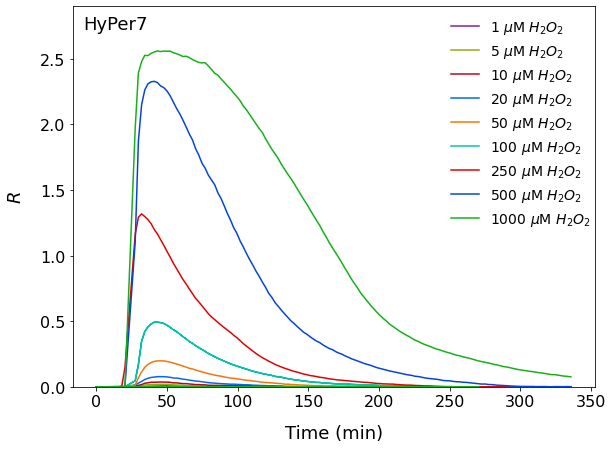

In [3]:
import matplotlib.pyplot as plt

# Define custom colors for each concentration
colors = ['xkcd:purple', 'xkcd:pea green', 'xkcd:scarlet', 'xkcd:bright blue',
          'xkcd:orange', 'xkcd:turquoise', 'xkcd:red', 'xkcd:blue', 'xkcd:green']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the mean values for each concentration with custom colors
label_names = ['1 $\mu$M $H_{2}O_{2}$', '5 $\mu$M $H_{2}O_{2}$', '10 $\mu$M $H_{2}O_{2}$', '20 $\mu$M $H_{2}O_{2}$',
               '50 $\mu$M $H_{2}O_{2}$', '100 $\mu$M $H_{2}O_{2}$', '250 $\mu$M $H_{2}O_{2}$', '500 $\mu$M $H_{2}O_{2}$', '1000 $\mu$M $H_{2}O_{2}$']
for i, conc in enumerate(columns_to_average):
    mean_values = combined_hyper7[f"{conc}_mean"]
    ax.plot(combined_hyper7['Time'], mean_values, color=colors[i], label=label_names[i])

# Set labels and legend
ax.set_xlabel('Time (min)', size=18, labelpad=15)
ax.set_ylabel('$R$', size=18, labelpad=15)
ax.set_ylim(0,2.9)
legend = ax.legend(bbox_to_anchor=(0.7, 1), loc='upper left', frameon=False, prop={'size': 14})
ax.annotate('HyPer7', xy=(0.02, 0.94), xycoords='axes fraction', size=18)
#ax.annotate(r'E', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
           # verticalalignment='center', size=18)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)

# Show the plot
plt.savefig("Hyper7_profile_FR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()



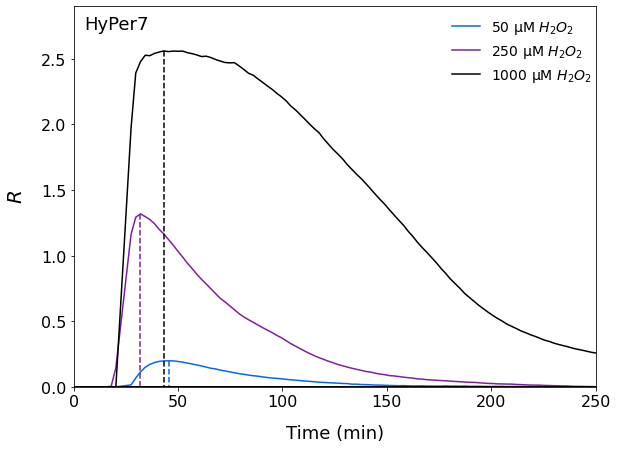

In [4]:
import matplotlib.pyplot as plt

# Define custom colors for each concentration
colors = ['xkcd:bright blue', 'xkcd:purple', 'xkcd:black', 'xkcd:bright blue',
          'xkcd:orange', 'xkcd:turquoise', 'xkcd:red', 'xkcd:blue', 'xkcd:green']

# Define the concentrations to plot
concentrations_to_plot = ['H50uM', 'H250uM', 'H1000uM']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the mean values for each concentration with custom colors
label_names = ['50 µM $H_{2}O_{2}$', '250 µM $H_{2}O_{2}$', '1000 µM $H_{2}O_{2}$']
for conc, color, label_name in zip(concentrations_to_plot, colors[:3], label_names):
    mean_values = combined_hyper7[f"{conc}_mean"]
    ax.plot(combined_hyper7['Time'], mean_values, color=color, label=label_name)
    
    # Find the index of the maximum value
    max_index = mean_values.idxmax()
    # Get the x and y coordinates of the maximum point
    x_max = combined_hyper7['Time'].iloc[max_index]
    y_max = mean_values.iloc[max_index]
    # Plot a line from the maximum point to the bottom of the plot
    ax.plot([x_max, x_max], [y_max, 0], color=color, linestyle='--')

# Set labels and legend
ax.set_xlabel('Time (min)', size=18, labelpad=15)
ax.set_ylabel('$R$', size=20, labelpad=15)
ax.set_ylim(0, 2.9)
ax.set_xlim(0,250)
legend = ax.legend(bbox_to_anchor=(0.7, 1), loc='upper left', frameon=False, prop={'size': 14})
ax.annotate('HyPer7', xy=(0.02, 0.94), xycoords='axes fraction', size=18)
#ax.annotate(r'E', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
 #           verticalalignment='center', size=18)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)

# Show the plot
plt.savefig("Hyper7_profile_Figure1.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()


In [5]:
import pandas as pd

df7 = pd.read_csv('tsa2b.csv')

columns_to_average = ['H1uM', 'H5uM', 'H10uM', 'H20uM', 'H50uM', 'H100uM']
num_repetitions = 3

# Iterate over each concentration and perform the averaging
for conc in columns_to_average:
    col_labels = [f"{conc}_{i}" for i in range(1, num_repetitions+1)]
    df7[f"{conc}_mean"] = df7[col_labels].mean(axis=1)

# Drop the individual columns after averaging
df7 = df7.drop(columns=[f"{conc}_{i}" for conc in columns_to_average for i in range(1, num_repetitions+1)])

print(df7)

       Time  H1uM_mean  H5uM_mean  H10uM_mean  H20uM_mean  H50uM_mean  \
0      0.00   0.000000   0.000000    0.000000    0.000000    0.000000   
1      2.25   0.000000   0.000000    0.001333    0.000000    0.000000   
2      4.50   0.000000   0.000000    0.000000    0.000000    0.000000   
3      6.75   0.000000   0.000000    0.000222    0.000000    0.000000   
4      9.00   0.000000   0.000000    0.000889    0.000000    0.000000   
..      ...        ...        ...         ...         ...         ...   
114  261.53   0.025889   0.007000    0.014333    0.008889    0.011333   
115  263.78   0.025444   0.005222    0.011333    0.006778    0.010000   
116  266.03   0.026333   0.006333    0.014000    0.006000    0.009333   
117  268.28   0.027667   0.006000    0.013000    0.006667    0.009667   
118  270.53   0.026889   0.008778    0.016333    0.008444    0.015000   

     H100uM_mean  
0       0.000000  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
..       

In [6]:
import pandas as pd

df6 = pd.read_csv('tsa2a.csv')

columns_to_average = ['H100uM', 'H250uM', 'H500uM', 'H1000uM']
num_repetitions = 3

# Iterate over each concentration and perform the averaging
for conc in columns_to_average:
    col_labels = [f"{conc}_{i}" for i in range(1, num_repetitions+1)]
    df6[f"{conc}_mean"] = df6[col_labels].mean(axis=1)

print(df6)



       Time  H100uM_1  H100uM_2  H100uM_3  H250uM_1  H250uM_2  H250uM_3  \
0      0.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      2.25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      4.50  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      6.75  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      9.00  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..      ...       ...       ...       ...       ...       ...       ...   
143  326.78  0.039333  0.037333  0.031333  0.091333  0.049333  0.040333   
144  329.03  0.035333  0.037333  0.028333  0.088333  0.048333  0.041333   
145  331.28  0.029000  0.033000  0.025000  0.086000  0.044000  0.034000   
146  333.53  0.036333  0.033333  0.024333  0.085333  0.046333  0.034333   
147  335.78  0.028333  0.033333  0.020333  0.081333  0.040333  0.033333   

     H500uM_1  H500uM_2  H500uM_3  H1000uM_1  H1000uM_2  H1000uM_3  \
0    0.000000  0.000000  0.00

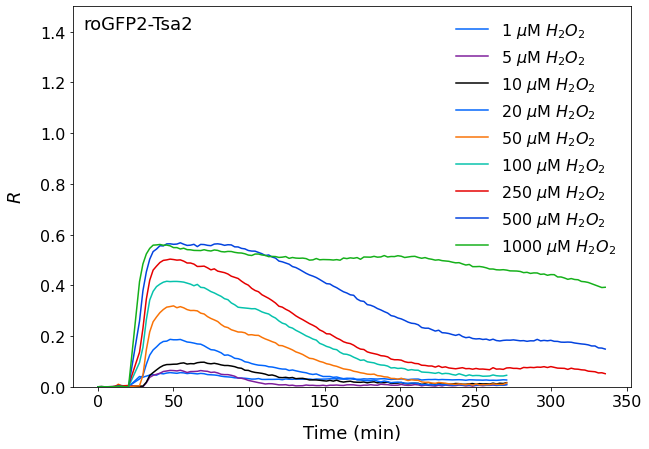

In [7]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, (ax) = plt.subplots(figsize=(10, 7))


# Probe data
ax.plot(df7.Time, df7.H1uM_mean, color='xkcd:bright blue', label='1 $\mu$M $H_{2}O_{2}$')
ax.plot(df7.Time, df7.H5uM_mean, color='xkcd:purple', label='5 $\mu$M $H_{2}O_{2}$')
ax.plot(df7.Time, df7.H10uM_mean, color='xkcd:black', label='10 $\mu$M $H_{2}O_{2}$',)
ax.plot(df7.Time, df7.H20uM_mean, color='xkcd:bright blue', label='20 $\mu$M $H_{2}O_{2}$')
ax.plot(df7.Time, df7.H50uM_mean, color='xkcd:orange', label='50 $\mu$M $H_{2}O_{2}$')
ax.plot(df7.Time, df7.H100uM_mean, color='xkcd:turquoise', label='100 $\mu$M $H_{2}O_{2}$')
ax.plot(df6.Time, df6.H250uM_mean, '-', color='xkcd:red', label='250 $\mu$M $H_{2}O_{2}$')
ax.plot(df6.Time, df6.H500uM_mean, '-', color='xkcd:blue', label='500 $\mu$M $H_{2}O_{2}$')
ax.plot(df6.Time, df6.H1000uM_mean, '-', color='xkcd:green', label='1000 $\mu$M $H_{2}O_{2}$')

ax.annotate('roGFP2-Tsa2', xy=(0.02, 0.94), xycoords='axes fraction', size=18)
ax.set_ylim(0, 0.65)

# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0,1.5)
# Legend and labels
legend = ax.legend(loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 16}, frameon=False)
#ax.annotate(r'F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
 #           verticalalignment='center', size=18)
ax.set_ylabel(r'$R$', size=14)
ax.set_xlabel(r'Time (min)', size=14)

plt.ylabel(r'$R$', size=18, labelpad=15)
plt.xlabel(r'Time (min)', size=18, labelpad=15)

plt.savefig("roGFPTSA_profile_FR.png", dpi=400, bbox_extra_artists=(legend,), bbox_inches='tight', pad_inches=0.5)


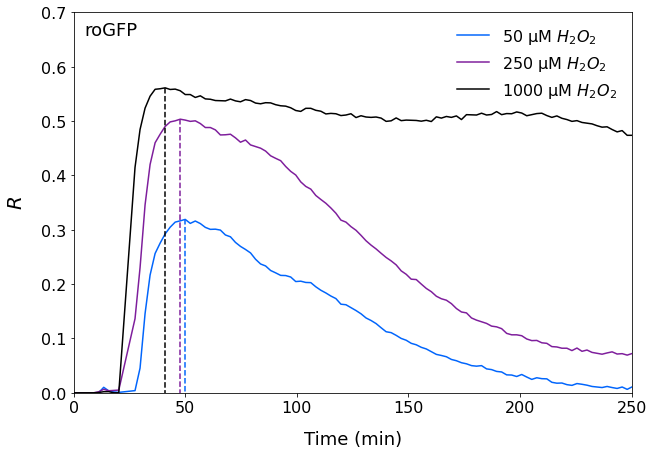

In [8]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, (ax) = plt.subplots(figsize=(10, 7))

# Probe data
ax.plot(df7.Time, df7.H50uM_mean, color='xkcd:bright blue', label='50 µM $H_{2}O_{2}$')
ax.plot(df6.Time, df6.H250uM_mean, '-', color='xkcd:purple', label='250 µM $H_{2}O_{2}$')
ax.plot(df6.Time, df6.H1000uM_mean, '-', color='xkcd:black', label='1000 µM $H_{2}O_{2}$')

# Set labels and legend
ax.set_ylabel('$R$', size=20, labelpad=15)
ax.set_xlabel('Time (min)', size=18, labelpad=15)
ax.set_ylim(0, 0.7)
ax.set_xlim(0,250)
ax.tick_params(axis='both', which='major', labelsize=16)

# Find the maximum point and plot a line to the bottom of the plot for 250 µM and 1000 µM
for df, color in zip([df6], ['xkcd:purple']):  
    for conc in ['H250uM']:
        mean_values = df[f"{conc}_mean"]
        max_index = mean_values.idxmax()
        x_max = df['Time'].iloc[max_index]
        y_max = mean_values.iloc[max_index]
        ax.plot([x_max, x_max], [y_max, 0], color=color, linestyle='--')
        
# Find the maximum point and plot a line to the bottom of the plot for 250 µM and 1000 µM
for df, color in zip([df6], [ 'xkcd:black']):  
    for conc in ['H1000uM']:
        mean_values = df[f"{conc}_mean"]
        max_index = mean_values.idxmax()
        x_max = df['Time'].iloc[max_index]
        y_max = mean_values.iloc[max_index]
        ax.plot([x_max, x_max], [y_max, 0], color=color, linestyle='--')


# Find the maximum point and plot a line to the bottom of the plot for 50 µM
for df, color in zip([df7], ['xkcd:bright blue']):
    for conc in ['H50uM']:
        mean_values = df[f"{conc}_mean"]
        max_index = mean_values.idxmax()
        x_max = df['Time'].iloc[max_index]
        y_max = mean_values.iloc[max_index]
        ax.plot([x_max, x_max], [y_max, 0], color=color, linestyle='--')
ax.annotate('roGFP', xy=(0.02, 0.94), xycoords='axes fraction', size=18)
# Legend and labels
legend = ax.legend(loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 16}, frameon=False)
#ax.annotate('F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
 #           verticalalignment='center', size=18)

# Save and show the plot
plt.savefig("roGFPTSA_profile_Figure1.png", dpi=400, bbox_extra_artists=(legend,), bbox_inches='tight', pad_inches=0.5)
plt.show()


In [9]:
#df=pd.read_csv('probe_data_redone2.csv')#signal parameter data
#

read_file = pd.read_excel ("probe_data_redone2.xlsx", sheet_name='probe_data_redone2')
read_file.to_csv ("probe_data_redone2_FR.csv", index = None,header=True)
probe_data_redone2_FR = pd.DataFrame(pd.read_csv("probe_data_redone2_FR.csv"))
probe_data_redone2_FR.round(3)

,Conc,HP_AUC,Hyper_AUC_error,Hyper_Tau,Hyper_Tau_error,Hyper_The,Hyper_The_error,Hyper_Amp,Hyper_Amp_error,TSA_AUC,TSA_AUC_error,TSA_Tau,TSA_Tau_error,TSA_The,TSA_The_error,TSA_Amp,TSA_Amp_error
0,1,0.326,0.218,67.965,16.708,51.688,25.423,0.003,0.002,1.294,6.287,41.544,14.027,101.114,29.320,0.098,0.072
1,5,0.642,0.071,49.947,1.856,14.065,0.989,0.023,0.002,3.640,0.058,78.086,5.263,95.070,33.643,0.028,0.014
2,10,1.782,0.110,64.278,4.773,24.617,3.407,0.037,0.003,7.157,1.030,51.939,1.599,84.554,4.026,0.043,0.008
3,20,3.851,0.189,62.612,1.117,24.058,0.032,0.080,0.004,14.845,0.898,77.135,7.759,45.984,7.327,0.168,0.024
4,50,11.427,0.383,70.686,1.940,33.048,2.638,0.174,0.008,28.105,1.135,81.529,1.398,12.220,3.630,0.320,0.005
5,100,29.726,0.164,72.810,0.837,35.787,0.522,0.416,0.005,92.283,0.931,98.482,0.216,50.222,0.955,0.359,0.002
6,250,77.267,4.692,67.466,2.030,37.248,0.579,1.040,0.078,66.052,1.896,120.140,2.830,74.329,3.201,0.445,0.008
7,500,192.090,3.422,82.658,0.946,46.201,0.728,2.079,0.013,107.616,0.844,143.242,0.587,81.931,0.596,0.657,0.001
8,1000,353.272,7.217,108.557,0.549,62.327,0.326,2.833,0.046,154.066,0.624,173.778,0.461,88.616,0.081,0.869,0.003


Fig2A_AUC_FR LinregressResult(slope=0.36088376641192, intercept=-3.1430367402629003, rvalue=0.9984293625304409, pvalue=5.048234569301361e-10, stderr=0.007653910157032085, intercept_stderr=2.9373536035008816)

Fig2A_Amp_FR LinregressResult(slope=0.003022195281967406, intercept=0.09261443702642758, rvalue=0.9781184011811687, pvalue=4.995031420005999e-06, stderr=0.0002429672516176406, intercept_stderr=0.09324393903632154)

Fig2A_Tau_FR LinregressResult(slope=0.04467044141120069, intercept=62.277439500625306, rvalue=0.9243115495845923, pvalue=0.00036453722323191094, stderr=0.006971164715900638, intercept_stderr=2.6753352703043887)

Fig2A_The_FR LinregressResult(slope=0.033044613662719484, intercept=29.451473637207155, rvalue=0.7417674844088423, pvalue=0.022141101000547656, stderr=0.011292352307302465, intercept_stderr=4.333684490845709)

Fig2A_T_AUC_FR LinregressResult(slope=0.14654297662032953, intercept=21.261085807004665, rvalue=0.8982152646591887, pvalue=0.0010014930360096937, stderr=0

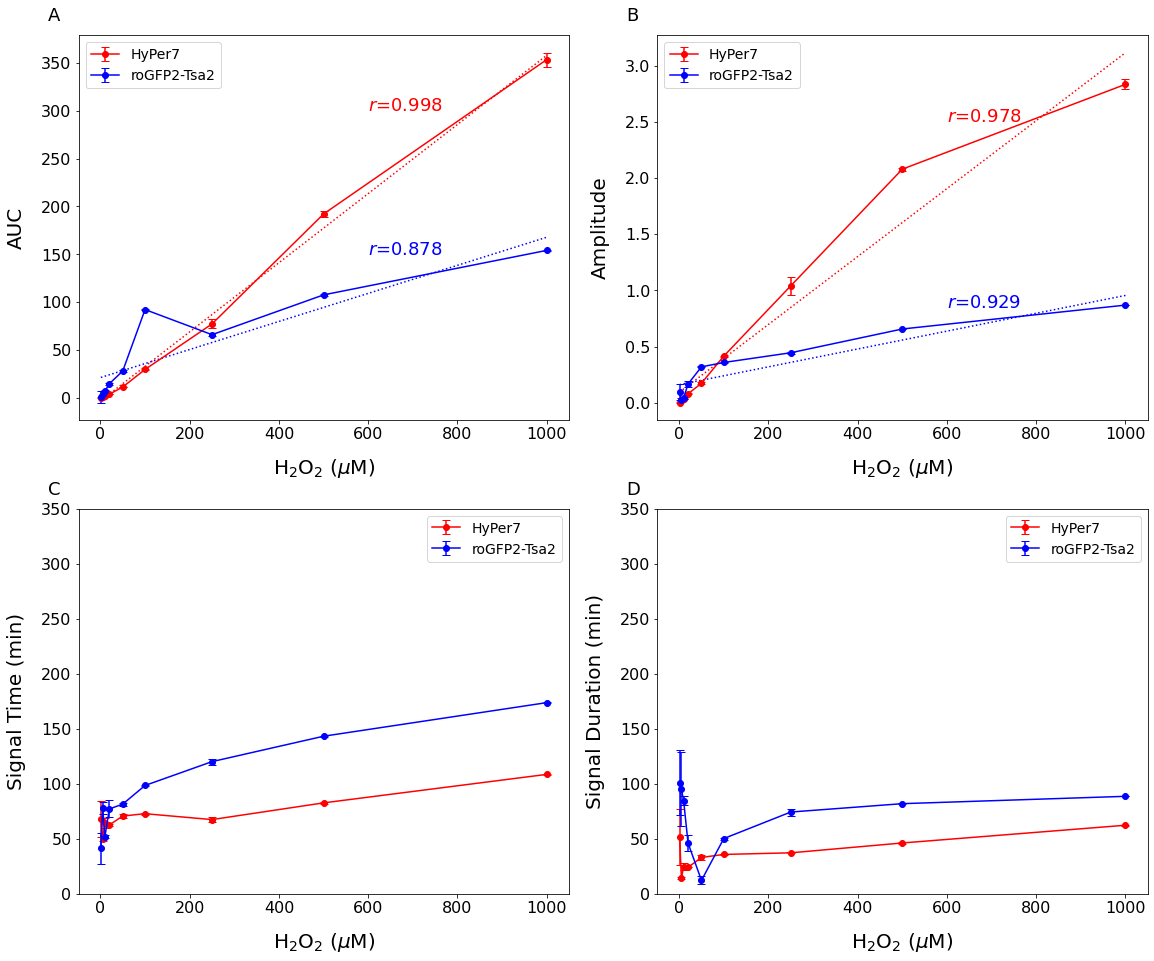

In [10]:
probe_data_redone2=pd.read_csv('probe_data_redone2_FR.csv')#signal parameter data

#AUC
p=probe_data_redone2.Conc
q=probe_data_redone2.HP_AUC
from scipy.stats import linregress
Fig2A_AUC_FR=linregress(p, q)
print ('Fig2A_AUC_FR', Fig2A_AUC_FR)
print ('')


#Amp
p=probe_data_redone2.Conc
q=probe_data_redone2.Hyper_Amp
from scipy.stats import linregress
Fig2A_Amp_FR=linregress(p, q)
print ('Fig2A_Amp_FR', Fig2A_Amp_FR)
print ('')

#Signal Time
p=probe_data_redone2.Conc
q=probe_data_redone2.Hyper_Tau
from scipy.stats import linregress
Fig2A_Tau_FR=linregress(p, q)
print ('Fig2A_Tau_FR', Fig2A_Tau_FR)
print ('')

#Signal Duration
p=probe_data_redone2.Conc
q=probe_data_redone2.Hyper_The
from scipy.stats import linregress
Fig2A_The_FR=linregress(p, q)
print ('Fig2A_The_FR', Fig2A_The_FR)
print ('')

#AUC
p=probe_data_redone2.Conc
q=probe_data_redone2.TSA_AUC
from scipy.stats import linregress
Fig2AT_AUC_FR=linregress(p, q)
print ('Fig2A_T_AUC_FR', Fig2AT_AUC_FR)
print ('')

#Amp
p=probe_data_redone2.Conc
q=probe_data_redone2.TSA_Amp
from scipy.stats import linregress
Fig2AT_Amp_FR=linregress(p, q)
print ('Fig2A_T_Amp_FR', Fig2AT_Amp_FR)
print ('')

#Signal Time
p=probe_data_redone2.Conc
q=probe_data_redone2.TSA_Tau
from scipy.stats import linregress
Fig2AT_Tau_FR=linregress(p, q)
print ('Fig2A_T_Tau_FR', Fig2AT_Tau_FR)
print ('')

#Signal Duration
p=probe_data_redone2.Conc
q=probe_data_redone2.TSA_The
from scipy.stats import linregress
Fig2AT_The_FR=linregress(p, q)
print ('Fig2A_T_The_FR', Fig2AT_The_FR)



fig=plt.figure(figsize=(18,15))

#AUC
ax = fig.add_subplot(221)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.HP_AUC, probe_data_redone2_FR.Hyper_AUC_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.TSA_AUC, probe_data_redone2_FR.TSA_AUC_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
ax.plot(probe_data_redone2_FR.Conc, 0.36088376641192*probe_data_redone2_FR.Conc-3.1430367402629003, 'r:')
ax.annotate('$r$=0.998', xy=(600, 300), xycoords='data',color= 'red',size=18)
ax.plot(probe_data_redone2_FR.Conc, 0.14654297662032953*probe_data_redone2_FR.Conc+21.261085807004665, 'b:' )
ax.annotate('$r$=0.878', xy=(600, 150), xycoords='data',color= 'blue',size=18)
ax.annotate(r'A', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'AUC', labelpad=15,size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)



#Amp
ax = fig.add_subplot(222)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.Hyper_Amp, probe_data_redone2_FR.Hyper_Amp_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.TSA_Amp, probe_data_redone2_FR.TSA_Amp_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
ax.plot(probe_data_redone2_FR.Conc, 0.003022195281967406*probe_data_redone2_FR.Conc+0.09261443702642758, 'r:')
ax.annotate('$r$=0.978', xy=(600, 2.5), xycoords='data',color= 'red',size=18)
ax.plot(probe_data_redone2_FR.Conc, 0.0007943093679805264*probe_data_redone2_FR.Conc+0.1611506587926083, 'b:' )
ax.annotate('$r$=0.929', xy=(600, 0.85), xycoords='data',color= 'blue',size=18)
ax.annotate(r'B', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'Amplitude',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)


#Tau
ax = fig.add_subplot(223)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.Hyper_Tau, probe_data_redone2_FR.Hyper_Tau_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.TSA_Tau, probe_data_redone2_FR.TSA_Tau_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
#ax.plot(probe_data_redone2.Conc,0.04467044141120069*probe_data_redone2.Conc+62.277439500625306, 'r:' )
#ax.plot(probe_data_redone2.Conc, 0.11615522692127687*probe_data_redone2.Conc+71.22207643221523, 'b:' )
#ax.annotate('$r$=0.924', xy=(500, 95), xycoords='data',color= 'red',size=18)
#ax.annotate('$r$=0.915', xy=(500, 155), xycoords='data',color= 'blue',size=18)
ax.annotate(r'C', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'Signal Time (min)',labelpad=15, size=20)
ax.set_ylim(0,350)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)


#Theta
ax = fig.add_subplot(224)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.Hyper_The, probe_data_redone2_FR.Hyper_The_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.TSA_The, probe_data_redone2_FR.TSA_The_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
ax.annotate(r'D', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
#ax.plot(probe_data_redone2.Conc, 0.033044613662719484*probe_data_redone2.Conc+0.1611506587926083, 'r:' )
#ax.plot(probe_data_redone2.Conc, 0.021725477618080906*probe_data_redone2.Conc+65.77558709238156, 'b:' )
#ax.annotate('$r$=0.742', xy=(600, 45), xycoords='data',color= 'red',size=18)
#ax.annotate('$r$=0.255', xy=(600, 75), xycoords='data',color= 'blue',size=18)
ax.set_ylim(0,350)
ax.set_ylabel(r'Signal Duration (min)',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0.18, hspace=0.23, right=0.95, top=0.92)
xls = pd.ExcelFile('de_Cubas_redone.xlsx')
df1 = pd.read_excel(xls, 'Hyper')
fig.savefig('HyPer7_roGFP2-Tsa2_FR', dpi=400)

C:\Users\diane\AppData\Local\Temp\ipykernel_8012\1677100717.py:106: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(linear_conc_tsa2, linear_regression_tsa2.predict(linear_conc_tsa2), 'b--', linestyle='--')
C:\Users\diane\AppData\Local\Temp\ipykernel_8012\1677100717.py:108: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(linear_conc_tsa3, linear_regression_tsa3.predict(linear_conc_tsa3), 'b-.', linestyle='-.')


Linear regression for HyPer7 (0-100 μM) is statistically relevant at the 5% level.
Linear regression for HyPer7 (100-1000 μM) is statistically relevant at the 5% level.
Linear regression for HyPer7 (0-1000 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (0-100 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (100-1000 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (0-1000 μM) is statistically relevant at the 5% level.


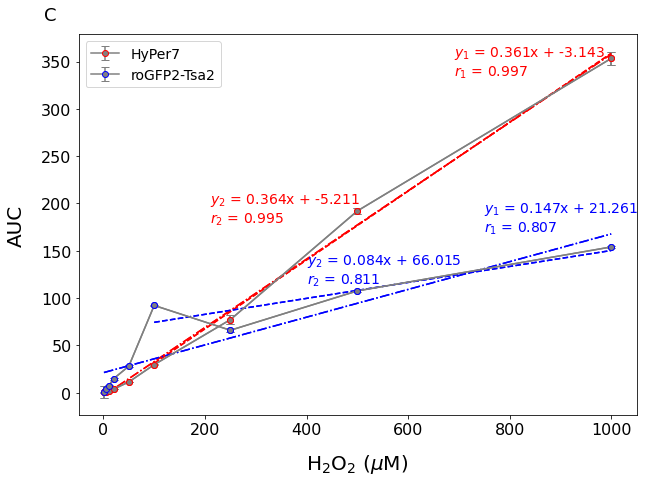

In [11]:
from sklearn.linear_model import LinearRegression

# Identify the linear portion of the curve for HyPer7 (0-100 μM)
linear_start_conc_hp1 = 0    # Start concentration for linear region
linear_end_conc_hp1 = 100    # End concentration for linear region

linear_indices_hp1 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp1) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp1))[0]
linear_conc_hp1 = probe_data_redone2_FR.Conc[linear_indices_hp1].values.reshape(-1, 1)
linear_hp_auc1 = probe_data_redone2_FR.HP_AUC[linear_indices_hp1].values

# Perform linear regression on the linear portion of the curve for HyPer7 (0-100 μM)
linear_regression_hp1 = LinearRegression().fit(linear_conc_hp1, linear_hp_auc1)
linear_slope_hp1 = linear_regression_hp1.coef_[0]
linear_intercept_hp1 = linear_regression_hp1.intercept_

# Identify the linear portion of the curve for HyPer7 (100-500 μM)
linear_start_conc_hp2 = 100    # Start concentration for linear region
linear_end_conc_hp2 = 1000      # End concentration for linear region

linear_indices_hp2 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp2) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp2))[0]
linear_conc_hp2 = probe_data_redone2_FR.Conc[linear_indices_hp2].values.reshape(-1, 1)
linear_hp_auc2 = probe_data_redone2_FR.HP_AUC[linear_indices_hp2].values

# Perform linear regression on the linear portion of the curve for HyPer7 (100-500 μM)
linear_regression_hp2 = LinearRegression().fit(linear_conc_hp2, linear_hp_auc2)
linear_slope_hp2 = linear_regression_hp2.coef_[0]
linear_intercept_hp2 = linear_regression_hp2.intercept_

# Identify the linear portion of the curve for HyPer7 (0-1000 μM)
linear_start_conc_hp3 = 0    # Start concentration for linear region
linear_end_conc_hp3 = 1000   # End concentration for linear region

linear_indices_hp3 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp3) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp3))[0]
linear_conc_hp3 = probe_data_redone2_FR.Conc[linear_indices_hp3].values.reshape(-1, 1)
linear_hp_auc3 = probe_data_redone2_FR.HP_AUC[linear_indices_hp3].values

# Perform linear regression on the linear portion of the curve for HyPer7 (0-1000 μM)
linear_regression_hp3 = LinearRegression().fit(linear_conc_hp3, linear_hp_auc3)
linear_slope_hp3 = linear_regression_hp3.coef_[0]
linear_intercept_hp3 = linear_regression_hp3.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (0-100 μM)
linear_start_conc_tsa1 = 0    # Start concentration for linear region
linear_end_conc_tsa1 = 100    # End concentration for linear region

linear_indices_tsa1 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa1) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa1))[0]
linear_conc_tsa1 = probe_data_redone2_FR.Conc[linear_indices_tsa1].values.reshape(-1, 1)
linear_tsa_auc1 = probe_data_redone2_FR.TSA_AUC[linear_indices_tsa1].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (0-100 μM)
linear_regression_tsa1 = LinearRegression().fit(linear_conc_tsa1, linear_tsa_auc1)
linear_slope_tsa1 = linear_regression_tsa1.coef_[0]
linear_intercept_tsa1 = linear_regression_tsa1.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (100-500 μM)
linear_start_conc_tsa2 = 100    # Start concentration for linear region
linear_end_conc_tsa2 = 1000      # End concentration for linear region

linear_indices_tsa2 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa2) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa2))[0]
linear_conc_tsa2 = probe_data_redone2_FR.Conc[linear_indices_tsa2].values.reshape(-1, 1)
linear_tsa_auc2 = probe_data_redone2_FR.TSA_AUC[linear_indices_tsa2].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (100-500 μM)
linear_regression_tsa2 = LinearRegression().fit(linear_conc_tsa2, linear_tsa_auc2)
linear_slope_tsa2 = linear_regression_tsa2.coef_[0]
linear_intercept_tsa2 = linear_regression_tsa2.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (0-1000 μM)
linear_start_conc_tsa3 = 0    # Start concentration for linear region
linear_end_conc_tsa3 = 1000   # End concentration for linear region

linear_indices_tsa3 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa3) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa3))[0]
linear_conc_tsa3 = probe_data_redone2_FR.Conc[linear_indices_tsa3].values.reshape(-1, 1)
linear_tsa_auc3 = probe_data_redone2_FR.TSA_AUC[linear_indices_tsa3].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (0-1000 μM)
linear_regression_tsa3 = LinearRegression().fit(linear_conc_tsa3, linear_tsa_auc3)
linear_slope_tsa3 = linear_regression_tsa3.coef_[0]
linear_intercept_tsa3 = linear_regression_tsa3.intercept_

# Plotting
plt.figure(figsize=(10, 7))
plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.HP_AUC, probe_data_redone2_FR.Hyper_AUC_error, marker='o',markeredgecolor='r', linestyle='solid', color='grey', capsize=4, label='HyPer7') #Hyper
plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.TSA_AUC, probe_data_redone2_FR.TSA_AUC_error, marker='o',markeredgecolor='b', linestyle='solid', color='grey', capsize=4, label='roGFP2-Tsa2') #TSA
#plt.plot(linear_conc_hp1, linear_regression_hp1.predict(linear_conc_hp1), 'k:', label='HyPer7 linear region (0-100 μM)')
#plt.annotate(f'$r$={linear_regression_hp1.score(linear_conc_hp1, linear_hp_auc1):.3f}', xy=(60,1), xycoords='data', color='k', size=14)
plt.plot(linear_conc_hp2, linear_regression_hp2.predict(linear_conc_hp2), 'r', linestyle='--')
#plt.annotate(f'$r$={linear_regression_hp2.score(linear_conc_hp2, linear_hp_auc2):.3f}', xy=(300, 180), xycoords='data', color='r', size=14)
plt.plot(linear_conc_hp3, linear_regression_hp3.predict(linear_conc_hp3), 'r',linestyle='-.')
#plt.annotate(f'$r$={linear_regression_hp3.score(linear_conc_hp3, linear_hp_auc3):.3f}', xy=(800, 335), xycoords='data', color='r', size=14)

#plt.plot(linear_conc_tsa1, linear_regression_tsa1.predict(linear_conc_tsa1), 'm:', label='roGFP2-Tsa2 linear region (0-100 μM)')
#plt.annotate(f'$r$={linear_regression_tsa1.score(linear_conc_tsa1, linear_tsa_auc1):.3f}', xy=(-10, 85), xycoords='data', color='m', size=14)
plt.plot(linear_conc_tsa2, linear_regression_tsa2.predict(linear_conc_tsa2), 'blue', linestyle='--')
#plt.annotate(f'$r$={linear_regression_tsa2.score(linear_conc_tsa2, linear_tsa_auc2):.3f}', xy=(365, 115), xycoords='data', color='blue', size=14)
plt.plot(linear_conc_tsa3, linear_regression_tsa3.predict(linear_conc_tsa3), 'blue', linestyle='-.')
#plt.annotate(f'$r$={linear_regression_tsa3.score(linear_conc_tsa3, linear_tsa_auc3):.3f}', xy=(800, 170), xycoords='data', color='blue', size=14)

plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.HP_AUC, probe_data_redone2_FR.Hyper_AUC_error, marker='o',markeredgecolor='r', linestyle='solid', color='grey', capsize=4) #Hyper
plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.TSA_AUC, probe_data_redone2_FR.TSA_AUC_error, marker='o', markeredgecolor='b',linestyle='solid', color='grey', capsize=4) #TSA
plt.plot(linear_conc_hp2, linear_regression_hp2.predict(linear_conc_hp2), 'r--')
plt.annotate(f'$y_2$ = {linear_slope_hp2:.3f}x + {linear_intercept_hp2:.3f}\n$r_2$ = {linear_regression_hp2.score(linear_conc_hp2, linear_hp_auc2):.3f}', xy=(210, 180), xycoords='data', color='r', size=14)
plt.plot(linear_conc_hp3, linear_regression_hp3.predict(linear_conc_hp3), 'r-.')
plt.annotate(f'$y_1$ = {linear_slope_hp3:.3f}x + {linear_intercept_hp3:.3f}\n$r_1$ = {linear_regression_hp3.score(linear_conc_hp3, linear_hp_auc3):.3f}', xy=(690, 335), xycoords='data', color='r', size=14)

plt.plot(linear_conc_tsa2, linear_regression_tsa2.predict(linear_conc_tsa2), 'b--', linestyle='--')
plt.annotate(f'$y_2$ = {linear_slope_tsa2:.3f}x + {linear_intercept_tsa2:.3f}\n$r_2$ = {linear_regression_tsa2.score(linear_conc_tsa2, linear_tsa_auc2):.3f}', xy=(400, 115), xycoords='data', color='blue', size=14)
plt.plot(linear_conc_tsa3, linear_regression_tsa3.predict(linear_conc_tsa3), 'b-.', linestyle='-.')
plt.annotate(f'$y_1$ = {linear_slope_tsa3:.3f}x + {linear_intercept_tsa3:.3f}\n$r_1$ = {linear_regression_tsa3.score(linear_conc_tsa3, linear_tsa_auc3):.3f}', xy=(750, 170), xycoords='data', color='blue', size=14)

# Check statistical relevance for HyPer7 (0-100 μM)
if linear_regression_hp1.score(linear_conc_hp1, linear_hp_auc1) >= 0.05:
    print("Linear regression for HyPer7 (0-100 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (0-100 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for HyPer7 (100-1000 μM)
if linear_regression_hp2.score(linear_conc_hp2, linear_hp_auc2) >= 0.05:
    print("Linear regression for HyPer7 (100-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (100-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for HyPer7 (0-1000 μM)
if linear_regression_hp3.score(linear_conc_hp3, linear_hp_auc3) >= 0.05:
    print("Linear regression for HyPer7 (0-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (0-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (0-100 μM)
if linear_regression_tsa1.score(linear_conc_tsa1, linear_tsa_auc1) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (0-100 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (0-100 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (100-1000 μM)
if linear_regression_tsa2.score(linear_conc_tsa2, linear_tsa_auc2) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (100-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (100-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (0-1000 μM)
if linear_regression_tsa3.score(linear_conc_tsa3, linear_tsa_auc3) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (0-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (0-1000 μM) is not statistically relevant at the 5% level.")

plt.annotate(r'C', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', size=18)
plt.ylabel(r'AUC', labelpad=15, size=20)
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=20)
plt.legend(loc='best', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('HyPer7_roGFP2-Tsa2_regressions_AUC', dpi=400)
plt.show()


Linear regression for HyPer7 (0-100 μM) is statistically relevant at the 5% level.
Linear regression for HyPer7 (100-1000 μM) is statistically relevant at the 5% level.
Linear regression for HyPer7 (0-1000 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (0-100 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (100-1000 μM) is statistically relevant at the 5% level.
Linear regression for roGFP2-Tsa2 (0-1000 μM) is statistically relevant at the 5% level.


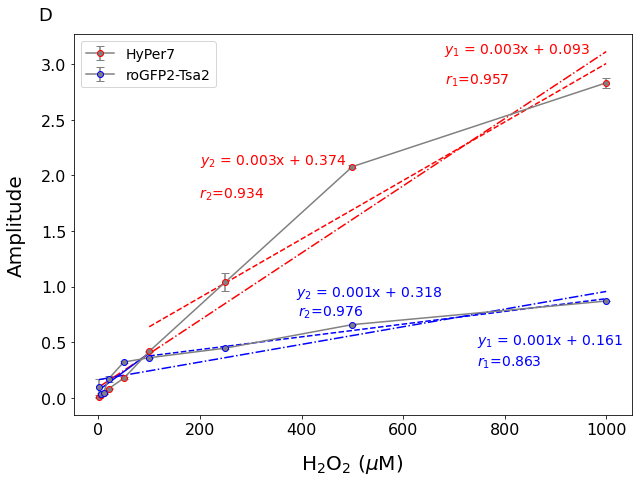

In [12]:
from sklearn.linear_model import LinearRegression

# Identify the linear portion of the curve for HyPer7 (0-100 μM)
linear_start_conc_hp1 = 0    # Start concentration for linear region
linear_end_conc_hp1 = 100    # End concentration for linear region

linear_indices_hp1 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp1) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp1))[0]
linear_conc_hp1 = probe_data_redone2_FR.Conc[linear_indices_hp1].values.reshape(-1, 1)
linear_hp_amp1 = probe_data_redone2_FR.Hyper_Amp[linear_indices_hp1].values

# Perform linear regression on the linear portion of the curve for HyPer7 (0-100 μM)
linear_regression_hp1 = LinearRegression().fit(linear_conc_hp1, linear_hp_amp1)
linear_slope_hp1 = linear_regression_hp1.coef_[0]
linear_intercept_hp1 = linear_regression_hp1.intercept_

# Identify the linear portion of the curve for HyPer7 (100-500 μM)
linear_start_conc_hp2 = 100    # Start concentration for linear region
linear_end_conc_hp2 = 1000      # End concentration for linear region

linear_indices_hp2 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp2) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp2))[0]
linear_conc_hp2 = probe_data_redone2_FR.Conc[linear_indices_hp2].values.reshape(-1, 1)
linear_hp_amp2 = probe_data_redone2_FR.Hyper_Amp[linear_indices_hp2].values

# Perform linear regression on the linear portion of the curve for HyPer7 (100-500 μM)
linear_regression_hp2 = LinearRegression().fit(linear_conc_hp2, linear_hp_amp2)
linear_slope_hp2 = linear_regression_hp2.coef_[0]
linear_intercept_hp2 = linear_regression_hp2.intercept_

# Identify the linear portion of the curve for HyPer7 (0-1000 μM)
linear_start_conc_hp3 = 0    # Start concentration for linear region
linear_end_conc_hp3 = 1000   # End concentration for linear region

linear_indices_hp3 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_hp3) & (probe_data_redone2_FR.Conc <= linear_end_conc_hp3))[0]
linear_conc_hp3 = probe_data_redone2_FR.Conc[linear_indices_hp3].values.reshape(-1, 1)
linear_hp_amp3 = probe_data_redone2_FR.Hyper_Amp[linear_indices_hp3].values

# Perform linear regression on the linear portion of the curve for HyPer7 (0-1000 μM)
linear_regression_hp3 = LinearRegression().fit(linear_conc_hp3, linear_hp_amp3)
linear_slope_hp3 = linear_regression_hp3.coef_[0]
linear_intercept_hp3 = linear_regression_hp3.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (0-100 μM)
linear_start_conc_tsa1 = 0    # Start concentration for linear region
linear_end_conc_tsa1 = 100    # End concentration for linear region

linear_indices_tsa1 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa1) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa1))[0]
linear_conc_tsa1 = probe_data_redone2_FR.Conc[linear_indices_tsa1].values.reshape(-1, 1)
linear_tsa_amp1 = probe_data_redone2_FR.TSA_Amp[linear_indices_tsa1].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (0-100 μM)
linear_regression_tsa1 = LinearRegression().fit(linear_conc_tsa1, linear_tsa_amp1)
linear_slope_tsa1 = linear_regression_tsa1.coef_[0]
linear_intercept_tsa1 = linear_regression_tsa1.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (100-500 μM)
linear_start_conc_tsa2 = 100    # Start concentration for linear region
linear_end_conc_tsa2 = 1000      # End concentration for linear region

linear_indices_tsa2 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa2) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa2))[0]
linear_conc_tsa2 = probe_data_redone2_FR.Conc[linear_indices_tsa2].values.reshape(-1, 1)
linear_tsa_amp2 = probe_data_redone2_FR.TSA_Amp[linear_indices_tsa2].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (100-500 μM)
linear_regression_tsa2 = LinearRegression().fit(linear_conc_tsa2, linear_tsa_amp2)
linear_slope_tsa2 = linear_regression_tsa2.coef_[0]
linear_intercept_tsa2 = linear_regression_tsa2.intercept_

# Identify the linear portion of the curve for roGFP2-Tsa2 (0-1000 μM)
linear_start_conc_tsa3 = 0    # Start concentration for linear region
linear_end_conc_tsa3 = 1000   # End concentration for linear region

linear_indices_tsa3 = np.where((probe_data_redone2_FR.Conc >= linear_start_conc_tsa3) & (probe_data_redone2_FR.Conc <= linear_end_conc_tsa3))[0]
linear_conc_tsa3 = probe_data_redone2_FR.Conc[linear_indices_tsa3].values.reshape(-1, 1)
linear_tsa_amp3 = probe_data_redone2_FR.TSA_Amp[linear_indices_tsa3].values

# Perform linear regression on the linear portion of the curve for roGFP2-Tsa2 (0-1000 μM)
linear_regression_tsa3 = LinearRegression().fit(linear_conc_tsa3, linear_tsa_amp3)
linear_slope_tsa3 = linear_regression_tsa3.coef_[0]
linear_intercept_tsa3 = linear_regression_tsa3.intercept_

# Plotting

plt.figure(figsize=(10, 7))
plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.Hyper_Amp, probe_data_redone2_FR.Hyper_Amp_error, marker='o',markeredgecolor='r', linestyle='solid', color='grey', capsize=4, label='HyPer7') #Hyper
plt.errorbar(probe_data_redone2_FR.Conc, probe_data_redone2_FR.TSA_Amp, probe_data_redone2_FR.TSA_Amp_error, marker='o', markeredgecolor='b',linestyle='solid', color='grey', capsize=4, label='roGFP2-Tsa2') #TSA
#plt.plot(linear_conc_hp1, linear_regression_hp1.predict(linear_conc_hp1), 'k:', label=f'HyPer7 linear region (0-100 μM) $r^2$={linear_regression_hp1.score(linear_conc_hp1, linear_hp_amp1):.3f}')
plt.plot(linear_conc_hp2, linear_regression_hp2.predict(linear_conc_hp2), 'r--')
plt.plot(linear_conc_hp3, linear_regression_hp3.predict(linear_conc_hp3), 'r-.')

plt.plot(linear_conc_tsa1, linear_regression_tsa1.predict(linear_conc_tsa1), 'b')
plt.plot(linear_conc_tsa2, linear_regression_tsa2.predict(linear_conc_tsa2), 'b--')
plt.plot(linear_conc_tsa3, linear_regression_tsa3.predict(linear_conc_tsa3), 'b-.')


# Add R-squared values to the plot
#plt.text(0.1, 0.25, f' $r^2$={linear_regression_hp1.score(linear_conc_hp1, linear_hp_amp1):.3f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.28, 0.58, f' $r_2$={linear_regression_hp2.score(linear_conc_hp2, linear_hp_amp2):.3f}', horizontalalignment='center', color='r', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.72, 0.88, f' $r_1$={linear_regression_hp3.score(linear_conc_hp3, linear_hp_amp3):.3f}', horizontalalignment='center', color='r', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)

#plt.text(0.17, 0.09, f'$r^2$={linear_regression_tsa1.score(linear_conc_tsa1, linear_tsa_amp1):.3f}', horizontalalignment='center', color='m',verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.46, 0.27, f'$r_2$={linear_regression_tsa2.score(linear_conc_tsa2, linear_tsa_amp2):.3f}', horizontalalignment='center', color='b', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
plt.text(0.78, 0.14, f'$r_1$={linear_regression_tsa3.score(linear_conc_tsa3, linear_tsa_amp3):.3f}', horizontalalignment='center', color='b', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)

plt.annotate(f'$y_2$ = {linear_slope_hp2:.3f}x + {linear_intercept_hp2:.3f}', xy=(200, 2.1), xycoords='data', color='r', size=14)
plt.annotate(f'$y_1$ = {linear_slope_hp3:.3f}x + {linear_intercept_hp3:.3f}', xy=(680, 3.1), xycoords='data', color='r', size=14)

plt.annotate(f'$y_2$ = {linear_slope_tsa2:.3f}x + {linear_intercept_tsa2:.3f}', xy=(390, 0.91), xycoords='data', color='blue', size=14)
plt.annotate(f'$y_1$ = {linear_slope_tsa3:.3f}x + {linear_intercept_tsa3:.3f}', xy=(745, 0.48), xycoords='data', color='blue', size=14)

# Check statistical relevance for HyPer7 (0-100 μM)
if linear_regression_hp1.score(linear_conc_hp1, linear_hp_amp1) >= 0.05:
    print("Linear regression for HyPer7 (0-100 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (0-100 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for HyPer7 (100-1000 μM)
if linear_regression_hp2.score(linear_conc_hp2, linear_hp_amp2) >= 0.05:
    print("Linear regression for HyPer7 (100-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (100-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for HyPer7 (0-1000 μM)
if linear_regression_hp3.score(linear_conc_hp3, linear_hp_amp3) >= 0.05:
    print("Linear regression for HyPer7 (0-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for HyPer7 (0-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (0-100 μM)
if linear_regression_tsa1.score(linear_conc_tsa1, linear_tsa_amp1) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (0-100 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (0-100 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (100-1000 μM)
if linear_regression_tsa2.score(linear_conc_tsa2, linear_tsa_amp2) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (100-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (100-1000 μM) is not statistically relevant at the 5% level.")

# Check statistical relevance for roGFP2-Tsa2 (0-1000 μM)
if linear_regression_tsa3.score(linear_conc_tsa3, linear_tsa_amp3) >= 0.05:
    print("Linear regression for roGFP2-Tsa2 (0-1000 μM) is statistically relevant at the 5% level.")
else:
    print("Linear regression for roGFP2-Tsa2 (0-1000 μM) is not statistically relevant at the 5% level.")


plt.annotate(r'D', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', size=18)
plt.ylabel(r'Amplitude', labelpad=15, size=20)
plt.xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=20)
plt.legend(loc='best', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('HyPer7_roGFP2-Tsa2_regressions_amp', dpi=400)
plt.show()




In [13]:
read_file = pd.read_excel ("probe_data_redone2.xlsx", sheet_name='probe_data_redone2')
read_file.to_csv ("probe_data_redone2_LR.csv", index = None,header=True)
probe_data_redone2_LR = pd.DataFrame(pd.read_csv("probe_data_redone2_LR.csv"))
probe_data_redone2_LR = probe_data_redone2_LR.drop([6,7,8])

probe_data_redone2_LR.round(3)

,Conc,HP_AUC,Hyper_AUC_error,Hyper_Tau,Hyper_Tau_error,Hyper_The,Hyper_The_error,Hyper_Amp,Hyper_Amp_error,TSA_AUC,TSA_AUC_error,TSA_Tau,TSA_Tau_error,TSA_The,TSA_The_error,TSA_Amp,TSA_Amp_error
0,1,0.326,0.218,67.965,16.708,51.688,25.423,0.003,0.002,1.294,6.287,41.544,14.027,101.114,29.320,0.098,0.072
1,5,0.642,0.071,49.947,1.856,14.065,0.989,0.023,0.002,3.640,0.058,78.086,5.263,95.070,33.643,0.028,0.014
2,10,1.782,0.110,64.278,4.773,24.617,3.407,0.037,0.003,7.157,1.030,51.939,1.599,84.554,4.026,0.043,0.008
3,20,3.851,0.189,62.612,1.117,24.058,0.032,0.080,0.004,14.845,0.898,77.135,7.759,45.984,7.327,0.168,0.024
4,50,11.427,0.383,70.686,1.940,33.048,2.638,0.174,0.008,28.105,1.135,81.529,1.398,12.220,3.630,0.320,0.005
5,100,29.726,0.164,72.810,0.837,35.787,0.522,0.416,0.005,92.283,0.931,98.482,0.216,50.222,0.955,0.359,0.002


Fig2A_AUC_LR LinregressResult(slope=0.29779027617079873, intercept=-1.2723688390725405, rvalue=0.9931921443195579, pvalue=6.936258694889371e-05, stderr=0.0174633273415526, intercept_stderr=0.8136861174868184)

Fig2A_Amp_LR LinregressResult(slope=0.004084204666806051, intercept=-0.004633632398011872, rvalue=0.9964653695118832, pvalue=1.8718338879130713e-05, stderr=0.0001721544256223534, intercept_stderr=0.008021361763031126)

Fig2A_Tau_LR LinregressResult(slope=0.13646756278132888, intercept=60.48577247598279, rvalue=0.6358214753055229, pvalue=0.17478922665664237, stderr=0.08283032513986417, intercept_stderr=3.8593954264866226)

Fig2A_The_LR LinregressResult(slope=0.05499576818592393, intercept=28.838822676646526, rvalue=0.16269174205176398, pvalue=0.7581154984826826, stderr=0.16676647489454013, intercept_stderr=7.770315635155308)

Fig2A_T_AUC_LR LinregressResult(slope=0.8890454545454545, intercept=-3.006409090909088, rvalue=0.9799798169492568, pvalue=0.0005971994720226723, stderr=0.090

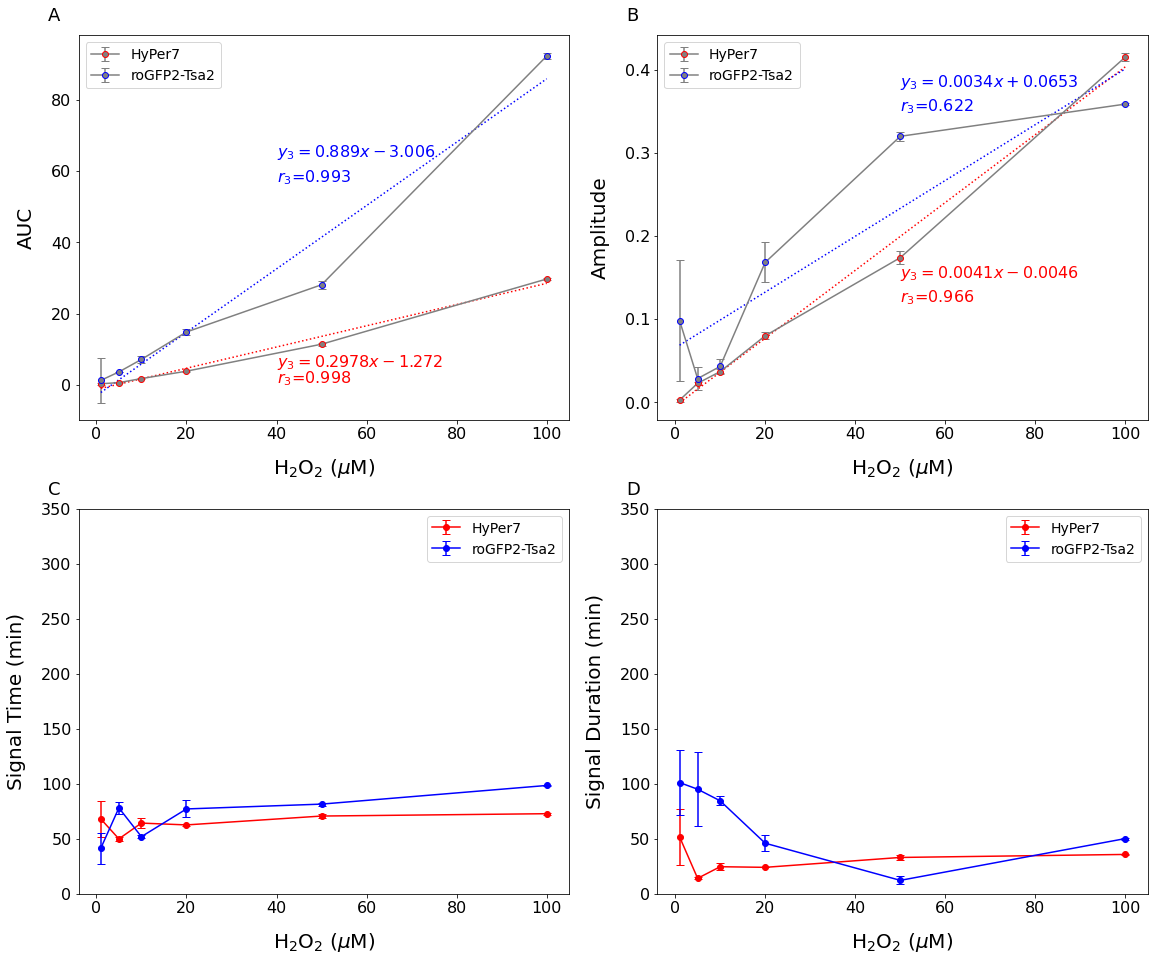

In [14]:
read_file = pd.read_excel ("probe_data_redone2.xlsx", sheet_name='probe_data_redone2')
read_file.to_csv ("probe_data_redone2_LR.csv", index = None,header=True)
probe_data_redone2_LR = pd.DataFrame(pd.read_csv("probe_data_redone2_LR.csv"))
probe_data_redone2_LR = probe_data_redone2_LR.drop([6,7,8])

#AUC
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.HP_AUC
from scipy.stats import linregress
Fig2A_AUC_LR=linregress(p, q)
print ('Fig2A_AUC_LR', Fig2A_AUC_LR)
print ('')


#Amp
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.Hyper_Amp
from scipy.stats import linregress
Fig2A_Amp_LR=linregress(p, q)
print ('Fig2A_Amp_LR', Fig2A_Amp_LR)
print ('')

#Signal Time
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.Hyper_Tau
from scipy.stats import linregress
Fig2A_Tau_LR=linregress(p, q)
print ('Fig2A_Tau_LR', Fig2A_Tau_LR)
print ('')

#Signal Duration
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.Hyper_The
from scipy.stats import linregress
Fig2A_The_LR=linregress(p, q)
print ('Fig2A_The_LR', Fig2A_The_LR)
print ('')

#AUC
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.TSA_AUC
from scipy.stats import linregress
Fig2AT_AUC_LR=linregress(p, q)
print ('Fig2A_T_AUC_LR', Fig2AT_AUC_LR)
print ('')

#Amp
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.TSA_Amp
from scipy.stats import linregress
Fig2AT_Amp_LR=linregress(p, q)
print ('Fig2A_T_Amp_LR', Fig2AT_Amp_LR)
print ('')

#Signal Time
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.TSA_Tau
from scipy.stats import linregress
Fig2AT_Tau_LR=linregress(p, q)
print ('Fig2A_T_Tau_LR', Fig2AT_Tau_LR)
print ('')

#Signal Duration
p=probe_data_redone2_LR.Conc
q=probe_data_redone2_LR.TSA_The
from scipy.stats import linregress
Fig2AT_The_LR=linregress(p, q)
print ('Fig2A_T_The_LR', Fig2AT_The_LR)



fig=plt.figure(figsize=(18,15))

#AUC
ax = fig.add_subplot(221)
ax.errorbar(probe_data_redone2_LR.Conc, probe_data_redone2_LR.HP_AUC, probe_data_redone2_LR.Hyper_AUC_error, marker='o',markeredgecolor='r', color='grey', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_LR.Conc, probe_data_redone2_LR.TSA_AUC, probe_data_redone2_LR.TSA_AUC_error, marker='o', markeredgecolor='b',color='grey', capsize=4, label='roGFP2-Tsa2') #TSA
ax.plot(probe_data_redone2_LR.Conc, 0.29779027617079873*probe_data_redone2_LR.Conc-1.2723688390725405, 'r:')
ax.annotate('$r_3$=0.998', xy=(40, 0.5), xycoords='data', color='red', size=16)
ax.plot(probe_data_redone2_LR.Conc, 0.8890454545454545*probe_data_redone2_LR.Conc-3.006409090909088, 'b:' )
ax.annotate('$r_3$=0.993', xy=(40, 57), xycoords='data', color='blue', size=16)
ax.annotate(r'A', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'AUC', labelpad=15,size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression equations
ax.text(40, 5, '$y_3 = 0.2978x - 1.272$', color='r', size=16)
ax.text(40, 64, '$y_3 = 0.889x - 3.006$', color='b', size=16)

#Amp
ax = fig.add_subplot(222)
ax.errorbar(probe_data_redone2_LR.Conc, probe_data_redone2_LR.Hyper_Amp, probe_data_redone2_LR.Hyper_Amp_error, markeredgecolor='r',marker='o', color='grey', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_LR.Conc, probe_data_redone2_LR.TSA_Amp, probe_data_redone2_LR.TSA_Amp_error, markeredgecolor='b',marker='o', color='grey', capsize=4, label='roGFP2-Tsa2') #TSA
ax.plot(probe_data_redone2_LR.Conc, 0.004084204666806051*probe_data_redone2_LR.Conc-0.004633632398011872, 'r:')
ax.annotate('$r_3$=0.966', xy=(50, 0.12), xycoords='data', color='red', size=16)
ax.plot(probe_data_redone2_LR.Conc, 0.0033599690622040743*probe_data_redone2_LR.Conc+0.06532761460694321, 'b:' )
ax.annotate('$r_3$=0.622', xy=(50, 0.35), xycoords='data', color='blue', size=16)
ax.annotate(r'B', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'Amplitude',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression equations
ax.text(50, 0.15, '$y_3 = 0.0041x - 0.0046$', color='r', size=16)
ax.text(50, 0.38, '$y_3 = 0.0034x + 0.0653$', color='b', size=16)


#Tau
ax = fig.add_subplot(223)
ax.errorbar(probe_data_redone2_LR.Conc,probe_data_redone2_LR.Hyper_Tau, probe_data_redone2_LR.Hyper_Tau_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_LR.Conc,probe_data_redone2_LR.TSA_Tau, probe_data_redone2_LR.TSA_Tau_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
#ax.plot(probe_data_redone2_HR.Conc,0.04437885779768*probe_data_redone2_HR.Conc+62.3475107880011, 'r:' )
#ax.plot(probe_data_redone2_HR.Conc, 0.08042340767531764*probe_data_redone2_HR.Conc+96.71472575254788, 'b:' )
#ax.annotate('$r$=0.960', xy=(500, 95), xycoords='data',color= 'red',size=16)
#ax.annotate('$r$=0.984', xy=(500, 155), xycoords='data',color= 'blue',size=16)
ax.annotate(r'C', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
ax.set_ylabel(r'Signal Time (min)',labelpad=15, size=20)
ax.set_ylim(0, 350)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)

#Theta
ax = fig.add_subplot(224)
ax.errorbar(probe_data_redone2_LR.Conc,probe_data_redone2_LR.Hyper_The, probe_data_redone2_LR.Hyper_The_error, marker='o', color='r', capsize=4, label='HyPer7') #Hyper
ax.errorbar(probe_data_redone2_LR.Conc,probe_data_redone2_LR.TSA_The, probe_data_redone2_LR.TSA_The_error, marker='o', color='b', capsize=4, label='roGFP2-Tsa2') #TSA
ax.annotate(r'D', xy=(-0.05,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=18)
#ax.plot(probe_data_redone2_HR.Conc, 0.030726351685245866*probe_data_redone2_HR.Conc+31.179571042046113, 'r:' )
#ax.plot(probe_data_redone2_HR.Conc, 0.03577709713470874*probe_data_redone2_HR.Conc+57.22774470020687, 'b:' )
#ax.annotate('$r$=0.994', xy=(600, 45), xycoords='data',color= 'red', size=16)
#ax.annotate('$r$=0.843', xy=(600, 75), xycoords='data',color= 'blue',size=16)
ax.set_ylabel(r'Signal Duration (min)',labelpad=15, size=20)
ax.set_ylim(0, 350)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best', fontsize=14)
# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)


fig.subplots_adjust(wspace=0.18, hspace=0.23, right=0.95, top=0.92)

#xls = pd.ExcelFile('de_Cubas_redone.xlsx')
#df1 = pd.read_excel(xls, 'Hyper')
fig.savefig('Hyper_roGFP_LR2.png', dpi=400)

# S. pombe Hyper7 vs roGFP2-Tpx1

In [15]:
xls = pd.ExcelFile('de_Cubas_redone.xlsx')
df1 = pd.read_excel(xls, 'Hyper')
df1

#Digitized data
xls = pd.ExcelFile('de_Cubas_redone.xlsx')
df2 = pd.read_excel(xls, 'Hyper7')
df2

xls = pd.ExcelFile('de_Cubas_redone.xlsx')
df3 = pd.read_excel(xls, 'rho-GFP')
df3

#Hyper
#create a dataframe in which I substract each column individually. 
df1_new = pd.DataFrame({'Time': df1['hTime'],'H100uM':df1.hOxD_100uM-df1.hOxD_0uM, 'H200uM':df1.hOxD_200uM-df1.hOxD_0uM, 'H1000uM':df1.hOxD_1000uM-df1.hOxD_0uM})
df1_new

,Time,H100uM,H200uM,H1000uM
0,0.000000,-0.000007,0.000007,0.004952
1,2.444046,0.002503,0.004959,-0.002455
2,4.654584,0.007428,0.000027,-0.007400
3,7.085505,-0.012318,-0.004918,0.000041
4,11.946125,0.461712,0.859242,0.908630
5,14.045557,0.437021,0.864193,0.970337
6,16.586973,0.417303,0.923445,1.002476
7,18.688847,0.318519,0.906141,0.975289
8,20.788584,0.249378,0.878994,0.972813
9,22.997292,0.170367,0.839482,1.022188


In [16]:
#Write a csv file which is easier to use
#df1_new.to_csv (r'C:\Users\chepillay\Dropbox\Papers in progress\Redox signaling\Sensor_papers_datasets\deCubas et al_sensor\deC_hyper_baseline.csv', index = False, header=True)
df1=pd.read_csv('deC_hyper_baseline.csv')
df1

,Time,H100uM,H200uM,H1000uM
0,0.000000,0.000000,0.000007,0.004952
1,2.444046,0.002503,0.004959,0.000000
2,4.654584,0.007428,0.000027,0.000000
3,7.085505,0.000000,0.000000,0.000041
4,11.946125,0.461712,0.859242,0.908630
5,14.045557,0.437021,0.864193,0.970337
6,16.586973,0.417303,0.923445,1.002476
7,18.688847,0.318519,0.906141,0.975289
8,20.788584,0.249378,0.878994,0.972813
9,22.997292,0.170367,0.839482,1.022188


In [17]:
#create a dataframe in which I substract each column individually. 
df2_new = pd.DataFrame({'Time': df2['h7Time'],'H5uM':df2.h7OxD_5uM-df2.h7OxD_0uM, 'H10uM':df2.h7OxD_10uM-df2.h7OxD_0uM, 'H25uM':df2.h7OxD_25uM-df2.h7OxD_0uM, 'H50uM':df2.h7OxD_50uM-df2.h7OxD_0uM, 'H100uM':df2.h7OxD_100uM-df2.h7OxD_0uM, 'H200uM':df2.h7OxD_200uM-df2.h7OxD_0uM, 'H1000uM':df2.h7OxD_1000uM-df2.h7OxD_0uM})
df2_new

,Time,H5uM,H10uM,H25uM,H50uM,H100uM,H200uM,H1000uM
0,0.000000,0.002217,0.006652,0.000000,0.002217,0.000000,-0.002217,0.002217
1,1.260606,-0.002217,0.000000,0.002217,-0.004435,-0.004435,-0.006652,-0.002217
2,2.715152,-0.006652,-0.002217,0.000000,-0.002217,-0.011086,-0.004435,-0.002217
3,4.266667,0.004435,0.002217,0.000000,-0.002217,0.818182,-0.002217,-0.004435
4,7.272728,0.015521,0.059867,0.201774,0.410200,0.835920,0.933481,0.962306
5,9.987879,0.050998,0.106430,0.286031,0.507761,0.827051,0.940133,0.968958
6,12.606061,0.059867,0.124169,0.323725,0.536585,0.800443,0.937916,0.973392
7,15.806061,0.079823,0.137472,0.343681,0.532151,0.771619,0.937916,0.982262
8,19.006062,0.070953,0.128603,0.328160,0.507761,0.740576,0.937916,0.986696
9,21.818182,0.082040,0.128603,0.330377,0.501109,0.707317,0.933481,0.993348


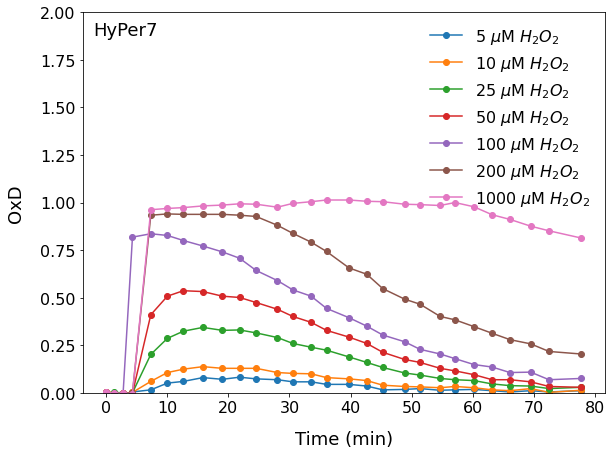

In [18]:
#Original data
from IPython.display import Image
#Image(filename='Slide2.jpg')
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot to check that the data is not all zeros
plt.plot(df2_new.Time, df2_new.H5uM, 'o-',label='5 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H10uM, 'o-',label='10 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H25uM, 'o-',label='25 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H50uM, 'o-',label='50 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H100uM, 'o-',label='100 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H200uM, 'o-',label='200 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H1000uM, 'o-',label='1000 $\mu$M $H_{2}O_{2}$')

# Legend and labels
ax.legend(loc='upper right', prop={'size': 16}, frameon=False)
#ax.annotate(r'F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
            #verticalalignment='center', size=18)
ax.set_ylim(0, 2)

# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)
ax.annotate('HyPer7', xy=(0.02, 0.94), xycoords='axes fraction', size=18)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)
plt.ylabel(r'OxD', size=18, labelpad=15)
plt.xlabel(r'Time (min)', size=18, labelpad=15)

# Save and show the plot
plt.savefig("HyPer7_pombeFR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [19]:
df3=pd.read_csv('deC_hyper7_baseline.csv')
df3

,Time,H5uM,H10uM,H25uM,H50uM,H100uM,H200uM,H1000uM
0,0.000000,0.002217,0.006652,0.000000,0.002217,0.000000,0.000000,0.002217
1,1.260606,0.000000,0.000000,0.002217,0.000000,0.000000,0.000000,0.000000
2,2.715152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.266667,0.004435,0.002217,0.000000,0.000000,0.818182,0.000000,0.000000
4,7.272728,0.015521,0.059867,0.201774,0.410200,0.835920,0.933481,0.962306
5,9.987879,0.050998,0.106430,0.286031,0.507761,0.827051,0.940133,0.968958
6,12.606061,0.059867,0.124169,0.323725,0.536585,0.800443,0.937916,0.973392
7,15.806061,0.079823,0.137472,0.343681,0.532151,0.771619,0.937916,0.982262
8,19.006062,0.070953,0.128603,0.328160,0.507761,0.740576,0.937916,0.986696
9,21.818182,0.082040,0.128603,0.330377,0.501109,0.707317,0.933481,0.993348


In [20]:
#rhoGFP
df3

,Time,H5uM,H10uM,H25uM,H50uM,H100uM,H200uM,H1000uM
0,0.000000,0.002217,0.006652,0.000000,0.002217,0.000000,0.000000,0.002217
1,1.260606,0.000000,0.000000,0.002217,0.000000,0.000000,0.000000,0.000000
2,2.715152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.266667,0.004435,0.002217,0.000000,0.000000,0.818182,0.000000,0.000000
4,7.272728,0.015521,0.059867,0.201774,0.410200,0.835920,0.933481,0.962306
5,9.987879,0.050998,0.106430,0.286031,0.507761,0.827051,0.940133,0.968958
6,12.606061,0.059867,0.124169,0.323725,0.536585,0.800443,0.937916,0.973392
7,15.806061,0.079823,0.137472,0.343681,0.532151,0.771619,0.937916,0.982262
8,19.006062,0.070953,0.128603,0.328160,0.507761,0.740576,0.937916,0.986696
9,21.818182,0.082040,0.128603,0.330377,0.501109,0.707317,0.933481,0.993348


In [21]:
xls = pd.ExcelFile('de_Cubas_redone.xlsx')
df3 = pd.read_excel(xls, 'rho-GFP')
df3

,rTime,rOxD_0uM,rOxD_1uM,rOxD_2uM,rOxD_5uM,rOxD_10uM,rOxD_25uM,rOxD_50uM,rOxD_100uM,rOxD_200uM,rOxD_1000uM
0,0.000000,0.463386,0.460719,0.473801,0.473815,0.476461,0.499993,0.479022,0.494771,0.486918,0.473815
1,1.473802,0.447559,0.476348,0.481562,0.484201,0.473730,0.526093,0.478944,0.497283,0.502540,0.489423
2,2.769036,0.436982,0.460535,0.486670,0.486720,0.486698,0.505023,0.463181,0.484088,0.476220,0.455306
3,3.853330,0.457803,0.473539,0.489175,0.504924,0.523220,0.653968,0.470935,0.476149,0.918345,0.470942
4,7.044248,0.481194,0.489146,0.483790,0.512579,0.530967,0.727090,0.716782,0.858136,0.981038,0.931470
5,9.864701,0.454817,0.489047,0.486266,0.538615,0.593589,0.753084,0.813463,0.926029,0.999157,0.983641
6,12.678416,0.438962,0.462515,0.496546,0.564581,0.606508,0.763378,0.828993,0.938962,0.993723,0.975604
7,15.601850,0.446595,0.472809,0.509423,0.577528,0.622031,0.755319,0.839287,0.938777,0.975186,0.980648
8,19.064207,0.433329,0.459302,0.496142,0.577273,0.627011,0.736782,0.823311,0.917594,0.977612,0.964715
9,21.986176,0.417417,0.443411,0.495944,0.545711,0.598052,0.718280,0.820565,0.891218,0.953847,0.956670


In [22]:
df3_new = pd.DataFrame({'Time': df3['rTime'],'H5uM':df3.rOxD_5uM-df3.rOxD_0uM, 'H10uM':df3.rOxD_10uM-df3.rOxD_0uM, 'H25uM':df3.rOxD_25uM-df3.rOxD_0uM, 'H50uM':df3.rOxD_50uM-df3.rOxD_0uM, 'H100uM':df3.rOxD_100uM-df3.rOxD_0uM, 'H200uM':df3.rOxD_200uM-df3.rOxD_0uM, 'H1000uM':df3.rOxD_1000uM-df3.rOxD_0uM})
df3_new

,Time,H5uM,H10uM,H25uM,H50uM,H100uM,H200uM,H1000uM
0,0.000000,0.010429,0.013075,0.036607,0.015636,0.031385,0.023532,0.010429
1,1.473802,0.036642,0.026171,0.078534,0.031385,0.049724,0.054981,0.041864
2,2.769036,0.049738,0.049717,0.068042,0.026199,0.047106,0.039239,0.018325
3,3.853330,0.047120,0.065417,0.196165,0.013132,0.018346,0.460542,0.013139
4,7.044248,0.031385,0.049774,0.245896,0.235588,0.376942,0.499844,0.450276
5,9.864701,0.083798,0.138772,0.298266,0.358646,0.471211,0.544340,0.528824
6,12.678416,0.125619,0.167546,0.324416,0.390031,0.500000,0.554761,0.536642
7,15.601850,0.130933,0.175435,0.308723,0.392691,0.492182,0.528590,0.534053
8,19.064207,0.143944,0.193682,0.303452,0.389982,0.484265,0.544283,0.531385
9,21.986176,0.128294,0.180635,0.300863,0.403148,0.473801,0.536430,0.539253


In [23]:
#Replace the negative numbers with zero or the integration wont work
df3_new.loc[df3_new['H5uM'] < 0, 'H5uM']=0
df3_new.loc[df3_new['H10uM'] < 0, 'H10uM']=0
df3_new.loc[df3_new['H25uM'] < 0, 'H25uM']=0
df3_new.loc[df3_new['H50uM'] < 0, 'H50uM']=0
df3_new.loc[df3_new['H100uM'] < 0, 'H100uM']=0
df3_new.loc[df3_new['H200uM'] < 0, 'H200uM']=0
df3_new.loc[df3_new['H1000uM'] < 0, 'H1000uM']=0
df3_new

,Time,H5uM,H10uM,H25uM,H50uM,H100uM,H200uM,H1000uM
0,0.000000,0.010429,0.013075,0.036607,0.015636,0.031385,0.023532,0.010429
1,1.473802,0.036642,0.026171,0.078534,0.031385,0.049724,0.054981,0.041864
2,2.769036,0.049738,0.049717,0.068042,0.026199,0.047106,0.039239,0.018325
3,3.853330,0.047120,0.065417,0.196165,0.013132,0.018346,0.460542,0.013139
4,7.044248,0.031385,0.049774,0.245896,0.235588,0.376942,0.499844,0.450276
5,9.864701,0.083798,0.138772,0.298266,0.358646,0.471211,0.544340,0.528824
6,12.678416,0.125619,0.167546,0.324416,0.390031,0.500000,0.554761,0.536642
7,15.601850,0.130933,0.175435,0.308723,0.392691,0.492182,0.528590,0.534053
8,19.064207,0.143944,0.193682,0.303452,0.389982,0.484265,0.544283,0.531385
9,21.986176,0.128294,0.180635,0.300863,0.403148,0.473801,0.536430,0.539253


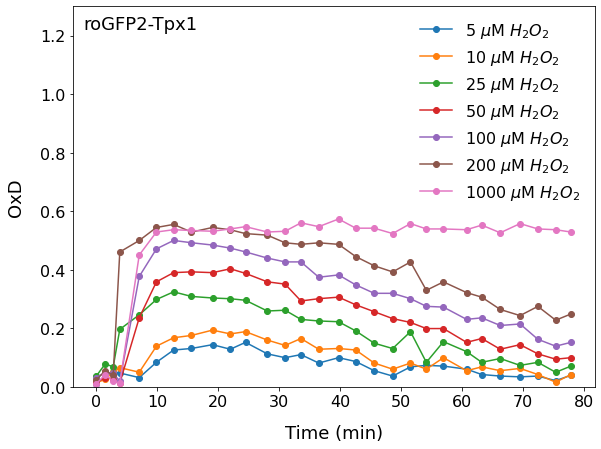

In [24]:
#Original data
from IPython.display import Image
#Image(filename='Slide3.jpg')
#Original data
from IPython.display import Image
#Image(filename='Slide2.jpg')
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot to check that the data is not all zeros
plt.plot(df3_new.Time, df3_new.H5uM, 'o-',label='5 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H10uM, 'o-',label='10 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H25uM, 'o-',label='25 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H50uM, 'o-',label='50 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H100uM, 'o-',label='100 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H200uM, 'o-',label='200 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H1000uM, 'o-',label='1000 $\mu$M $H_{2}O_{2}$')

# Legend and labels
ax.legend(loc='upper right', prop={'size': 16}, frameon=False)
#ax.annotate(r'F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
            #verticalalignment='center', size=18)
ax.set_ylim(0, 1.3)

# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)
ax.annotate('roGFP2-Tpx1', xy=(0.02, 0.94), xycoords='axes fraction', size=18)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)
plt.ylabel(r'OxD', size=18, labelpad=15)
plt.xlabel(r'Time (min)', size=18, labelpad=15)

# Save and show the plot
plt.savefig("roGFP2-Tpx1_pombeFR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [25]:
#Hyper7 pombe

import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_redone.xlsx')
hyper_sig = pd.read_excel(xls, 'Hyper7')

# Calculate linear regression for A
slope_A_H1, intercept_A_H1, r_value_A_H1, p_value_A_H1, _ = linregress(hyper_sig['Conc'], hyper_sig['A'])
print(f"A_H - Slope: {slope_A_H1}, Intercept: {intercept_A_H1}, r-value: {r_value_A_H1}")

# Calculate linear regression for Tau
slope_Tau_H1, intercept_Tau_H1, r_value_Tau_H1, p_value_Tau_H1, _ = linregress(hyper_sig['Conc'], hyper_sig['Tau'])
print(f"Tau_H1 - Slope: {slope_Tau_H1}, Intercept: {intercept_Tau_H1}, r-value: {r_value_Tau_H1}")

# Calculate linear regression for Theta
slope_Theta_H1, intercept_Theta_H1, r_value_Theta_H1, p_value_Theta_H1, _ = linregress(hyper_sig['Conc'], hyper_sig['Theta'])
print(f"Theta_H1 - Slope: {slope_Theta_H1}, Intercept: {intercept_Theta_H1}, r-value: {r_value_Theta_H1}")

# Calculate linear regression for Ii
slope_Ii_H1, intercept_Ii_H1, r_value_Ii_H1, p_value_Ii_H1, _ = linregress(hyper_sig['Conc'], hyper_sig['Ii'])
print(f"Ii_H1 - Slope: {slope_Ii_H1}, Intercept: {intercept_Ii_H1}, r-value: {r_value_Ii_H1}")


A_H - Slope: 0.001379422691469637, Intercept: 0.44919305876302523, r-value: 0.8427889891501849
Tau_H1 - Slope: 0.012572983272703217, Intercept: 28.569019936123162, r-value: 0.9531318568068963
Theta_H1 - Slope: 0.004613974296180309, Intercept: 16.103669134047895, r-value: 0.9111448248780185
Ii_H1 - Slope: 0.0594238322186928, Intercept: 14.588107453796084, r-value: 0.8880165210949286


In [26]:
import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_redone.xlsx')
rogfp_sig = pd.read_excel(xls, 'roGFP')

# Calculate linear regression for A
slope_A_r1, intercept_A_r1, r_value_A_r1, p_value_A_r1, _ = linregress(rogfp_sig['Conc'], rogfp_sig['A'])
print(f"A_r1 - Slope: {slope_A_r1}, Intercept: {intercept_A_r1}, r-value: {r_value_A_r1}")

# Calculate linear regression for Tau
slope_Tau_r1, intercept_Tau_r1, r_value_Tau_r1, p_value_Tau_r1, _ = linregress(rogfp_sig['Conc'], rogfp_sig['Tau'])
print(f"Tau_r1 - Slope: {slope_Tau_r1}, Intercept: {intercept_Tau_r1}, r-value: {r_value_Tau_r1}")

# Calculate linear regression for Theta
slope_Theta_r1, intercept_Theta_r1, r_value_Theta_r1, p_value_Theta_r1, _ = linregress(rogfp_sig['Conc'], rogfp_sig['Theta'])
print(f"Theta_r1 - Slope: {slope_Theta_r1}, Intercept: {intercept_Theta_r1}, r-value: {r_value_Theta_r1}")

# Calculate linear regression for Ii
slope_Ii_r1, intercept_Ii_r1, r_value_Ii_r1, p_value_Ii_r1, _ = linregress(rogfp_sig['Conc'], rogfp_sig['Ii'])
print(f"Ii_r1 - Slope: {slope_Ii_r1}, Intercept: {intercept_Ii_r1}, r-value: {r_value_Ii_r1}")


A_r1 - Slope: 0.0006097410273491101, Intercept: 0.3990716663646054, r-value: 0.7622640839622182
Tau_r1 - Slope: 0.008888032614654472, Intercept: 33.14713399122557, r-value: 0.9553029177890995
Theta_r1 - Slope: 0.002062762306426294, Intercept: 18.930637465418293, r-value: 0.8312183702485165
Ii_r1 - Slope: 0.026717362675292695, Intercept: 15.218840029477597, r-value: 0.789253354907002


C:\Users\diane\AppData\Local\Temp\ipykernel_8012\2753648292.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(hyper_sig.Conc, hyper_sig.Ii, 'o-', markeredgecolor='r', color='grey', label='HyPer7', linestyle='solid')
C:\Users\diane\AppData\Local\Temp\ipykernel_8012\2753648292.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(rogfp_sig.Conc, rogfp_sig.Ii, 'o-', markeredgecolor='b', color='grey', label='roGFP2-Tpx1', linestyle='solid')
C:\Users\diane\AppData\Local\Temp\ipykernel_8012\2753648292.py:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(hyper_sig.Conc, hyper_sig.A, 'o-', markeredgec

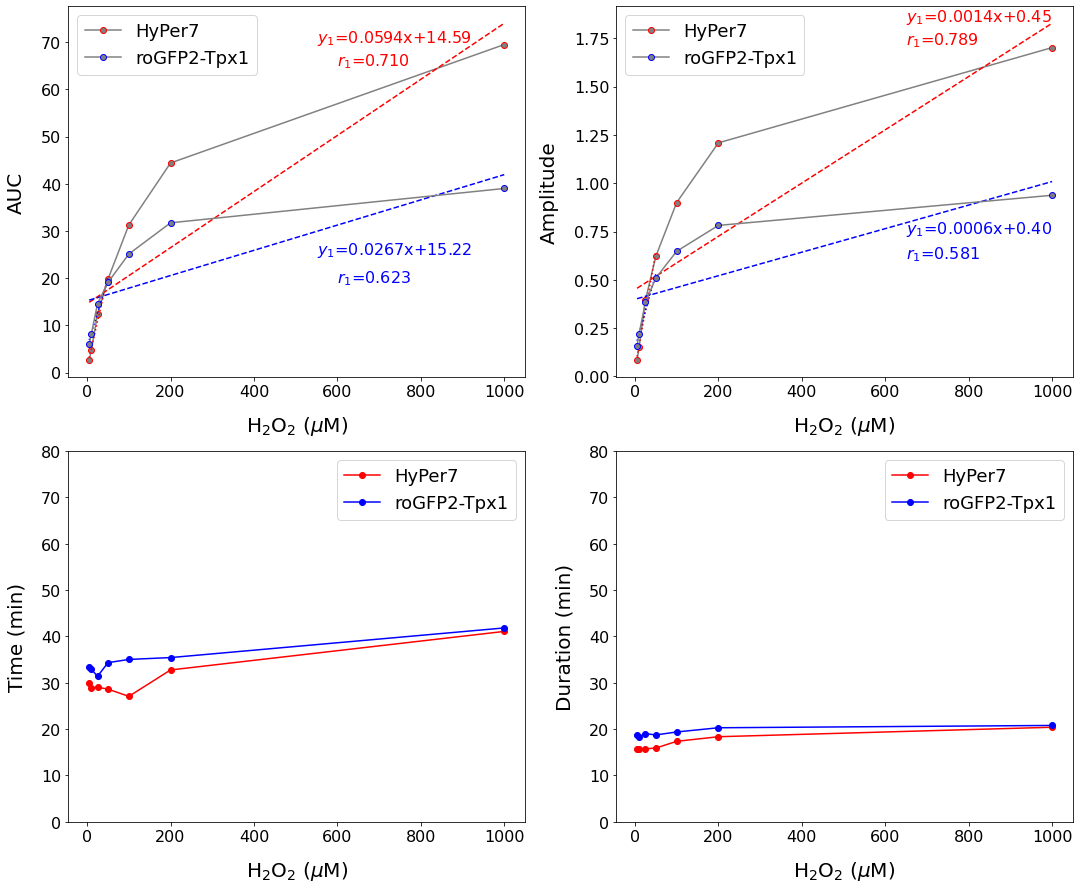

In [33]:
fig=plt.figure(figsize=(18,15))

#AUC
ax = fig.add_subplot(221)
ax.plot(hyper_sig.Conc, hyper_sig.Ii, 'o-', markeredgecolor='r', color='grey', label='HyPer7', linestyle='solid')
plt.plot(hyper_sig['Conc'], slope_Ii_H1 * hyper_sig['Conc'] + intercept_Ii_H1, color='red', linestyle='--')
plt.plot(rogfp_sig['Conc'], slope_Ii_r1 * rogfp_sig['Conc'] + intercept_Ii_r1, color='blue', linestyle='--')

ax.annotate('$r_1$=0.710', xy=(600, 65), xycoords='data', color='red', size=16)
ax.annotate('$r_1$=0.623', xy=(600, 19), xycoords='data', color='blue', size=16)
plt.plot(hyper_sig_LR['Conc'], slope_Ii_H * hyper_sig_LR['Conc'] + intercept_Ii_H, color='red', linestyle='dotted')
plt.plot(rogfp_sig_LR['Conc'], slope_Ii_r * rogfp_sig_LR['Conc'] + intercept_Ii_r, color='blue', linestyle='dotted')


#ax.annotate('$r_1$=0.991', xy=(50, 10), xycoords='data', color='red', size=16)
#ax.annotate('$r_1$=0.975', xy=(50, 2), xycoords='data', color='blue', size=16)

ax.plot(rogfp_sig.Conc, rogfp_sig.Ii, 'o-', markeredgecolor='b', color='grey', label='roGFP2-Tpx1', linestyle='solid')
ax.set_ylabel(r'AUC', labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=20)
ax.legend(loc='best', prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression line equations
eq_H1 = f"$y_1$={slope_Ii_H1:.4f}x+{intercept_Ii_H1:.2f}"
eq_r1 = f"$y_1$={slope_Ii_r1:.4f}x+{intercept_Ii_r1:.2f}"
#eq_H = f"$y_1$={slope_Ii_H:.2f}x+{intercept_Ii_H:.2f}"
#eq_r = f"$y_1$={slope_Ii_r:.2f}x+{intercept_Ii_r:.2f}"
ax.text(550, 70, eq_H1, color='red', fontsize=16)
ax.text(550, 25, eq_r1, color='blue', fontsize=16)
#ax.text(50, 14, eq_H, color='red', fontsize=16)
#ax.text(50, 6, eq_r, color='blue', fontsize=16)

#Amp
ax = fig.add_subplot(222)
ax.plot(hyper_sig.Conc, hyper_sig.A, 'o-', markeredgecolor='r', color='grey', label='HyPer7', linestyle='solid')
plt.plot(hyper_sig['Conc'], slope_A_H1 * hyper_sig['Conc'] + intercept_A_H1, color='red', linestyle='--')
plt.plot(rogfp_sig['Conc'], slope_A_r1 * rogfp_sig['Conc'] + intercept_A_r1, color='blue', linestyle='--')

ax.annotate('$r_1$=0.789', xy=(650, 1.72), xycoords='data', color='red', size=16)
ax.annotate('$r_1$=0.581', xy=(650, 0.61), xycoords='data', color='blue', size=16)

plt.plot(hyper_sig_LR['Conc'], slope_A_H * hyper_sig_LR['Conc'] + intercept_A_H, color='red', linestyle='dotted')
plt.plot(rogfp_sig_LR['Conc'], slope_A_r * rogfp_sig_LR['Conc'] + intercept_A_r, color='blue', linestyle='dotted')

#ax.annotate('$r_1$=0.991', xy=(30, 0.01), xycoords='data', color='red', size=16)
#ax.annotate('$r_1$=0.978', xy=(30, 0.22), xycoords='data', color='blue', size=16)

ax.plot(rogfp_sig.Conc, rogfp_sig.A, 'o-', markeredgecolor='b', color='grey', label='roGFP2-Tpx1', linestyle='solid')
ax.set_ylabel(r'Amplitude', labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=20)
ax.legend(loc='best', prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression line equations
eq_H1 = f"$y_1$={slope_A_H1:.4f}x+{intercept_A_H1:.2f}"
eq_r1 = f"$y_1$={slope_A_r1:.4f}x+{intercept_A_r1:.2f}"

#eq_H = f"$y_1$={slope_A_H:.2f}x+{intercept_A_H:.2f}"
#eq_r = f"$y_1$={slope_A_r:.2f}x+{intercept_A_r:.2f}"
ax.text(650, 1.84, eq_H1, color='red', fontsize=16)
ax.text(650, 0.74, eq_r1, color='blue', fontsize=16)
#ax.text(30, 0.1, eq_H, color='red', fontsize=16)
#ax.text(30, 0.3, eq_r, color='blue', fontsize=16)

#Time
ax = fig.add_subplot(223)
#ax.plot(df1.Conc, df1.Tau,'o-',color='k', label='HyPer')
ax.plot(hyper_sig.Conc, hyper_sig.Tau,'o-',color='r', label='HyPer7')
#plt.plot(hyper_sig['Conc'], slope_Tau_H1 * hyper_sig['Conc'] + intercept_Tau_H1, color='red', linestyle='--')
#plt.plot(rogfp_sig['Conc'], slope_Tau_r1 * rogfp_sig['Conc'] + intercept_Tau_r1, color='blue', linestyle='--')
#ax.annotate('$r$=0.953', xy=(40, 21), xycoords='data',color= 'red',size=16)
#ax.annotate('$r$=-0.955', xy=(40, 35), xycoords='data',color= 'blue',size=16)


ax.plot(rogfp_sig.Conc, rogfp_sig.Tau,'o-',color='b', label='roGFP2-Tpx1')
ax.set_ylim(0,80)
ax.set_ylabel(r'Time (min)',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best',prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

#Duration
ax = fig.add_subplot(224)
#ax.plot(df1.Conc, df1.Theta,'o-',color='k', label='HyPer')
ax.plot(hyper_sig.Conc, hyper_sig.Theta,'o-',color='r', label='HyPer7')
#plt.plot(hyper_sig['Conc'], slope_Theta_H * hyper_sig['Conc'] + intercept_Theta_H1, color='red', linestyle='--')
#plt.plot(rogfp_sig['Conc'], slope_Theta_r * rogfp_sig['Conc'] + intercept_Theta_r1, color='blue', linestyle='--')
#ax.annotate('$r$=0.910', xy=(40, 12), xycoords='data',color= 'red',size=16)
#ax.annotate('$r$=0.316', xy=(40, 21), xycoords='data',color= 'blue',size=16)


ax.plot(rogfp_sig.Conc, rogfp_sig.Theta,'o-',color='b', label='roGFP2-Tpx1')
ax.set_ylim(0,80)
ax.set_ylabel(r'Duration (min)',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best',prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_ylim(0,21)
plt.savefig("pombe_probes_sigparmsFR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)



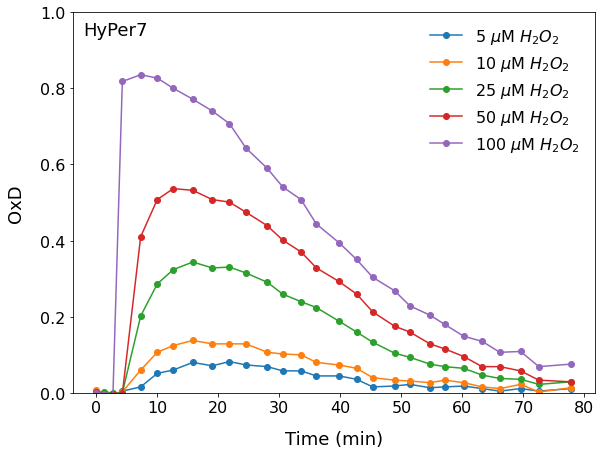

In [28]:
#Original data
from IPython.display import Image
#Image(filename='Slide2.jpg')
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot to check that the data is not all zeros
plt.plot(df2_new.Time, df2_new.H5uM, 'o-',label='5 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H10uM, 'o-',label='10 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H25uM, 'o-',label='25 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H50uM, 'o-',label='50 $\mu$M $H_{2}O_{2}$')
plt.plot(df2_new.Time, df2_new.H100uM, 'o-',label='100 $\mu$M $H_{2}O_{2}$')
#plt.plot(df2_new.Time, df2_new.H200uM, 'o-',label='200 $\mu$M $H_{2}O_{2}$')
#plt.plot(df2_new.Time, df2_new.H1000uM, 'o-',label='1000 $\mu$M $H_{2}O_{2}$')

# Legend and labels
ax.legend(loc='upper right', prop={'size': 16}, frameon=False)
#ax.annotate(r'F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
            #verticalalignment='center', size=18)
ax.set_ylim(0, 1)

# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)
ax.annotate('HyPer7', xy=(0.02, 0.94), xycoords='axes fraction', size=18)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)
plt.ylabel(r'OxD', size=18, labelpad=15)
plt.xlabel(r'Time (min)', size=18, labelpad=15)

# Save and show the plot
plt.savefig("HyPer7_pombeLR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

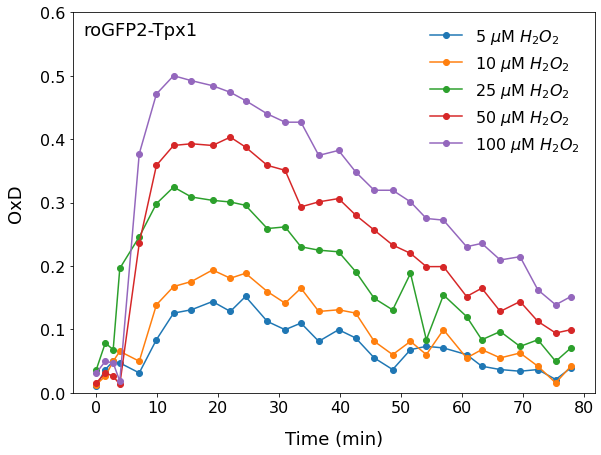

In [29]:
#Original data
from IPython.display import Image
#Image(filename='Slide3.jpg')
#Original data
from IPython.display import Image
#Image(filename='Slide2.jpg')
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Plot to check that the data is not all zeros
plt.plot(df3_new.Time, df3_new.H5uM, 'o-',label='5 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H10uM, 'o-',label='10 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H25uM, 'o-',label='25 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H50uM, 'o-',label='50 $\mu$M $H_{2}O_{2}$')
plt.plot(df3_new.Time, df3_new.H100uM, 'o-',label='100 $\mu$M $H_{2}O_{2}$')
#plt.plot(df3_new.Time, df3_new.H200uM, 'o-',label='200 $\mu$M $H_{2}O_{2}$')
#plt.plot(df3_new.Time, df3_new.H1000uM, 'o-',label='1000 $\mu$M $H_{2}O_{2}$')

# Legend and labels
ax.legend(loc='upper right', prop={'size': 16}, frameon=False)
#ax.annotate(r'F', xy=(-0.05, 1.05), xycoords='axes fraction', horizontalalignment='center',
            #verticalalignment='center', size=18)
ax.set_ylim(0, 0.6)

# Set tick label font size
ax.tick_params(axis='both', which='major', labelsize=16)
ax.annotate('roGFP2-Tpx1', xy=(0.02, 0.94), xycoords='axes fraction', size=18)

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.85)
plt.ylabel(r'OxD', size=18, labelpad=15)
plt.xlabel(r'Time (min)', size=18, labelpad=15)

# Save and show the plot
plt.savefig("roGFP2-Tpx1_pombeLR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

In [30]:
import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_redone.xlsx')
hyper_sig_LR = pd.read_excel(xls, 'Hyper7')
hyper_sig_LR = hyper_sig_LR.drop([4, 5, 6])

# Calculate linear regression for A
slope_A_H, intercept_A_H, r_value_A_H, p_value_A_H, _ = linregress(hyper_sig_LR['Conc'], hyper_sig_LR['A'])
print(f"A_H - Slope: {slope_A_H}, Intercept: {intercept_A_H}, r-value: {r_value_A_H}")

# Calculate linear regression for Tau
slope_Tau_H, intercept_Tau_H, r_value_Tau_H, p_value_Tau_H, _ = linregress(hyper_sig_LR['Conc'], hyper_sig_LR['Tau'])
print(f"Tau_H - Slope: {slope_Tau_H}, Intercept: {intercept_Tau_H}, r-value: {r_value_Tau_H}")

# Calculate linear regression for Theta
slope_Theta_H, intercept_Theta_H, r_value_Theta_H, p_value_Theta_H, _ = linregress(hyper_sig_LR['Conc'], hyper_sig_LR['Theta'])
print(f"Theta_H - Slope: {slope_Theta_H}, Intercept: {intercept_Theta_H}, r-value: {r_value_Theta_H}")

# Calculate linear regression for Ii
slope_Ii_H, intercept_Ii_H, r_value_Ii_H, p_value_Ii_H, _ = linregress(hyper_sig_LR['Conc'], hyper_sig_LR['Ii'])
print(f"Ii_H - Slope: {slope_Ii_H}, Intercept: {intercept_Ii_H}, r-value: {r_value_Ii_H}")


A_H - Slope: 0.012022997049888351, Intercept: 0.0419323822174652, r-value: 0.990149676406588
Tau_H - Slope: -0.020206099892947325, Intercept: 29.58361352656288, r-value: -0.7773368966839068
Theta_H - Slope: 0.005739376234504102, Intercept: 15.619477056423454, r-value: 0.9102432361875252
Ii_H - Slope: 0.38383877490254686, Intercept: 1.247011139300156, r-value: 0.9909278061382668


In [31]:
import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_redone.xlsx')
rogfp_sig_LR = pd.read_excel(xls, 'roGFP')
rogfp_sig_LR = rogfp_sig_LR.drop([4, 5, 6])

# Calculate linear regression for A
slope_A_r, intercept_A_r, r_value_A_r, p_value_A_r, _ = linregress(rogfp_sig_LR['Conc'], rogfp_sig_LR['A'])
print(f"A_r - Slope: {slope_A_r}, Intercept: {intercept_A_r}, r-value: {r_value_A_r}")

# Calculate linear regression for Tau
slope_Tau_r, intercept_Tau_r, r_value_Tau_r, p_value_Tau_r, _ = linregress(rogfp_sig_LR['Conc'], rogfp_sig_LR['Tau'])
print(f"Tau_r - Slope: {slope_Tau_r}, Intercept: {intercept_Tau_r}, r-value: {r_value_Tau_r}")

# Calculate linear regression for Theta
slope_Theta_r, intercept_Theta_r, r_value_Theta_r, p_value_Theta_r, _ = linregress(rogfp_sig_LR['Conc'], rogfp_sig_LR['Theta'])
print(f"Theta_r - Slope: {slope_Theta_r}, Intercept: {intercept_Theta_r}, r-value: {r_value_Theta_r}")

# Calculate linear regression for Ii
slope_Ii_r, intercept_Ii_r, r_value_Ii_r, p_value_Ii_r, _ = linregress(rogfp_sig_LR['Conc'], rogfp_sig_LR['Ii'])
print(f"Ii_r - Slope: {slope_Ii_r}, Intercept: {intercept_Ii_r}, r-value: {r_value_Ii_r}")


A_r - Slope: 0.007688189901811281, Intercept: 0.14550831334724765, r-value: 0.9784270741531268
Tau_r - Slope: 0.02253649187780278, Intercept: 32.505663685388036, r-value: 0.3717670232040376
Theta_r - Slope: 0.004305255582576619, Intercept: 18.62751493003411, r-value: 0.31627519358896045
Ii_r - Slope: 0.2903627783182484, Intercept: 5.421021935136804, r-value: 0.9749064107273884


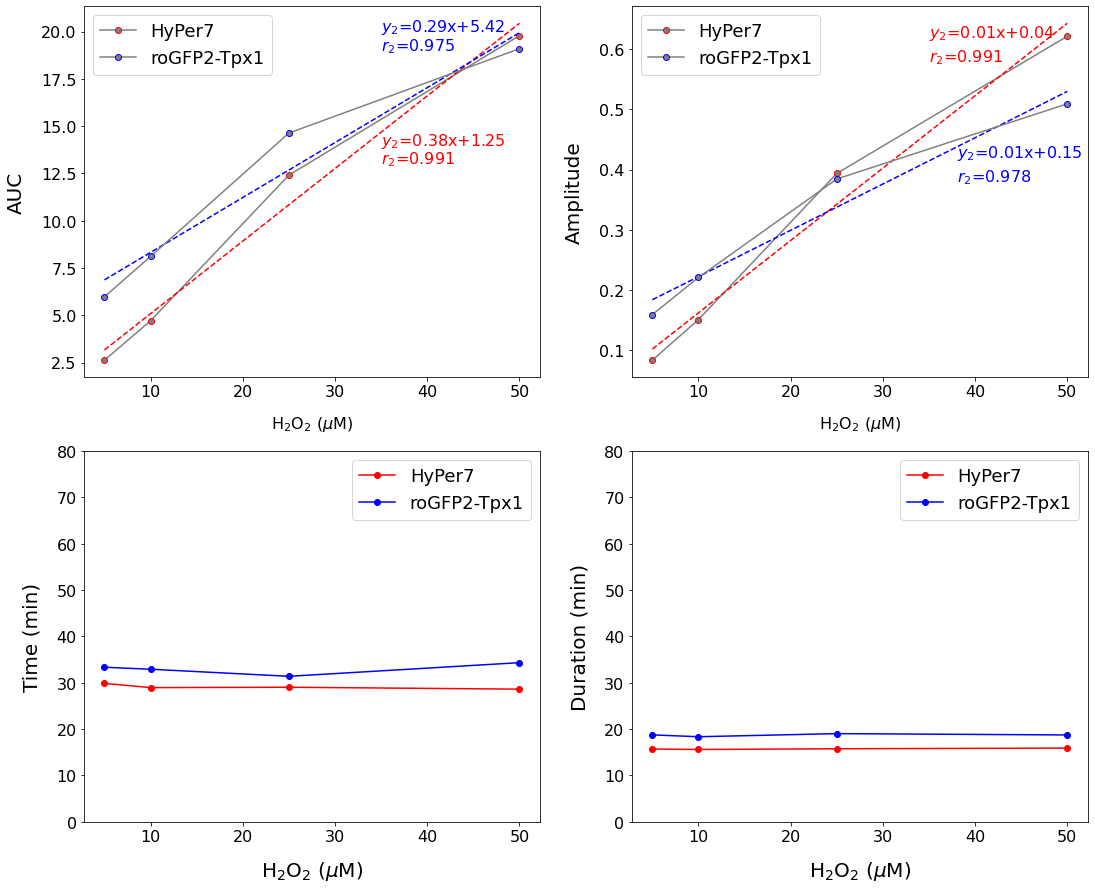

In [32]:
fig=plt.figure(figsize=(18,15))

#AUC
ax = fig.add_subplot(221)
ax.plot(hyper_sig_LR.Conc, hyper_sig_LR.Ii, 'o-',markeredgecolor='r', color='grey', label='HyPer7')
plt.plot(hyper_sig_LR['Conc'], slope_Ii_H * hyper_sig_LR['Conc'] + intercept_Ii_H, color='red', linestyle='--')
plt.plot(rogfp_sig_LR['Conc'], slope_Ii_r * rogfp_sig_LR['Conc'] + intercept_Ii_r, color='blue', linestyle='--')

ax.annotate('$r_2$=0.991', xy=(35, 13), xycoords='data', color='red', size=16)
ax.annotate('$r_2$=0.975', xy=(35, 19), xycoords='data', color='blue', size=16)

ax.plot(rogfp_sig_LR.Conc, rogfp_sig_LR.Ii, 'o-',markeredgecolor='b', color='grey', label='roGFP2-Tpx1')
ax.set_ylabel(r'AUC', labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=16)
ax.legend(loc='best', prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression line equations
eq_H = f"$y_2$={slope_Ii_H:.2f}x+{intercept_Ii_H:.2f}"
eq_r = f"$y_2$={slope_Ii_r:.2f}x+{intercept_Ii_r:.2f}"
ax.text(35, 14, eq_H, color='red', fontsize=16)
ax.text(35, 20, eq_r, color='blue', fontsize=16)

#Amp
ax = fig.add_subplot(222)
ax.plot(hyper_sig_LR.Conc, hyper_sig_LR.A, 'o-',markeredgecolor='r', color='grey', label='HyPer7')
plt.plot(hyper_sig_LR['Conc'], slope_A_H * hyper_sig_LR['Conc'] + intercept_A_H, color='red', linestyle='--')
plt.plot(rogfp_sig_LR['Conc'], slope_A_r * rogfp_sig_LR['Conc'] + intercept_A_r, color='blue', linestyle='--')

ax.annotate('$r_2$=0.991', xy=(35, 0.58), xycoords='data', color='red', size=16)
ax.annotate('$r_2$=0.978', xy=(38, 0.38), xycoords='data', color='blue', size=16)

ax.plot(rogfp_sig_LR.Conc, rogfp_sig_LR.A, 'o-', markeredgecolor='b', color='grey', label='roGFP2-Tpx1')
ax.set_ylabel(r'Amplitude', labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', labelpad=15, size=16)
ax.legend(loc='best', prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

# Add regression line equations
eq_H = f"$y_2$={slope_A_H:.2f}x+{intercept_A_H:.2f}"
eq_r = f"$y_2$={slope_A_r:.2f}x+{intercept_A_r:.2f}"
ax.text(35, 0.62, eq_H, color='red', fontsize=16)
ax.text(38, 0.42, eq_r, color='blue', fontsize=16)


#Time
ax = fig.add_subplot(223)
#ax.plot(df1.Conc, df1.Tau,'o-',color='k', label='HyPer')
ax.plot(hyper_sig_LR.Conc, hyper_sig_LR.Tau,'o-',color='r', label='HyPer7')
#plt.plot(hyper_sig_LR['Conc'], slope_Tau_H * hyper_sig_LR['Conc'] + intercept_Tau_H, color='red', linestyle='--')
#plt.plot(rogfp_sig_LR['Conc'], slope_Tau_r * rogfp_sig_LR['Conc'] + intercept_Tau_r, color='blue', linestyle='--')
#ax.annotate('$r$=0.991', xy=(40, 21), xycoords='data',color= 'red',size=16)
#ax.annotate('$r$=-0.777', xy=(40, 35), xycoords='data',color= 'blue',size=16)


ax.plot(rogfp_sig_LR.Conc, rogfp_sig_LR.Tau,'o-',color='b', label='roGFP2-Tpx1')
ax.set_ylim(0,80)
ax.set_ylabel(r'Time (min)',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best',prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)

#Duration
ax = fig.add_subplot(224)
#ax.plot(df1.Conc, df1.Theta,'o-',color='k', label='HyPer')
ax.plot(hyper_sig_LR.Conc, hyper_sig_LR.Theta,'o-',color='r', label='HyPer7')
#plt.plot(hyper_sig_LR['Conc'], slope_Theta_H * hyper_sig_LR['Conc'] + intercept_Theta_H, color='red', linestyle='--')
#plt.plot(rogfp_sig_LR['Conc'], slope_Theta_r * rogfp_sig_LR['Conc'] + intercept_Theta_r, color='blue', linestyle='--')
#ax.annotate('$r$=0.910', xy=(40, 12), xycoords='data',color= 'red',size=16)
#ax.annotate('$r$=0.316', xy=(40, 21), xycoords='data',color= 'blue',size=16)


ax.plot(rogfp_sig_LR.Conc, rogfp_sig_LR.Theta,'o-',color='b', label='roGFP2-Tpx1')
ax.set_ylim(0,80)
ax.set_ylabel(r'Duration (min)',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)',labelpad=15, size=20)
ax.legend(loc='best',prop={'size': 18})
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_ylim(0,21)
plt.savefig("pombe_probes_sigparmsLR.png", dpi=400, bbox_inches='tight', pad_inches=0.5)



# HyPer7 in different backgrounds (Pombe vs Baker's yeast)

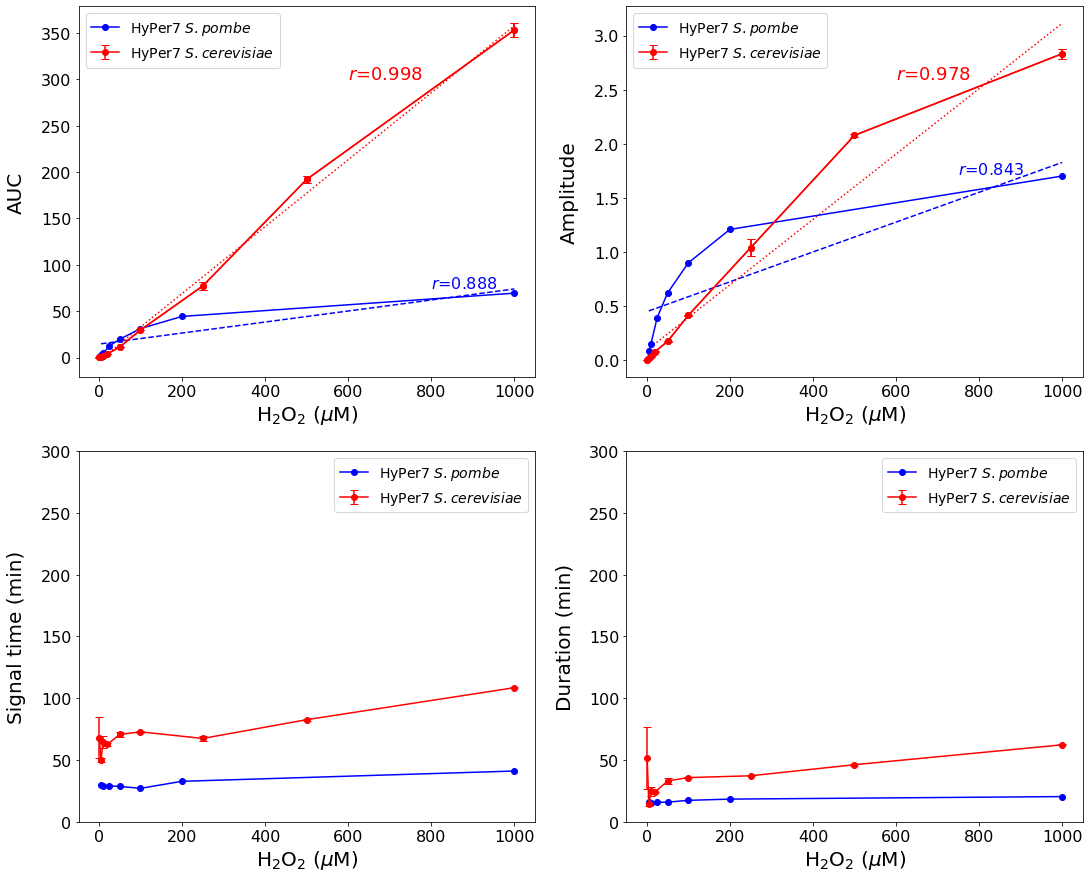

In [33]:
fig=plt.figure(figsize=(18,15))


#Amp
ax = fig.add_subplot(222)
#ax.plot(df1.Conc, df1.A,'o-',color='k', label='HyPer')
plt.plot(hyper_sig['Conc'], slope_A_H1 * hyper_sig['Conc'] + intercept_A_H1, color='blue', linestyle='--')
ax.annotate('$r$=0.843', xy=(750, 1.72), xycoords='data',color= 'blue',size=16)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.Hyper_Amp, probe_data_redone2_FR.Hyper_Amp_error, marker='o', color='r', capsize=4) #Hyper
ax.plot(probe_data_redone2_FR.Conc, 0.003022195281967406*probe_data_redone2_FR.Conc+0.09261443702642758, 'r:')
ax.annotate('$r$=0.978', xy=(600, 2.6), xycoords='data',color= 'red',size=18)


ax.plot(hyper_sig.Conc, hyper_sig.A,'o-',color='blue', label='HyPer7 $S.pombe$')
ax.errorbar(probe_data_redone2.Conc,probe_data_redone2.Hyper_Amp, probe_data_redone2.Hyper_Amp_error, marker='o', color='r', capsize=4, label='HyPer7 $S.cerevisiae$') #Hyper
ax.set_ylabel(r'Amplitude',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax.legend(loc='best', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)

#Time
ax = fig.add_subplot(223)
#ax.plot(df1.Conc, df1.Tau,'o-',color='k', label='HyPer')
ax.plot(hyper_sig.Conc, hyper_sig.Tau,'o-',color='blue', label='HyPer7 $S.pombe$')
ax.errorbar(probe_data_redone2.Conc,probe_data_redone2.Hyper_Tau, probe_data_redone2.Hyper_Tau_error, marker='o', color='r', capsize=4, label='HyPer7 $S.cerevisiae$') #Hyper
ax.set_ylabel(r'Signal time (min)',labelpad=15, size=20)
ax.set_ylim(0,300)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax.legend(loc='best', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)

#Duration
ax = fig.add_subplot(224)
#ax.plot(df1.Conc, df1.Theta,'o-',color='k', label='HyPer')
ax.plot(hyper_sig.Conc, hyper_sig.Theta,'o-',color='blue', label='HyPer7 $S.pombe$')
ax.errorbar(probe_data_redone2.Conc,probe_data_redone2.Hyper_The, probe_data_redone2.Hyper_The_error, marker='o', color='r', capsize=4, label='HyPer7 $S.cerevisiae$') #Hyper
ax.set_ylabel(r'Duration (min)',labelpad=15, size=20)
ax.set_ylim(0,300)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax.legend(loc='best', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)

#AUC
ax = fig.add_subplot(221)
#ax.plot(df1.Conc, df1.Ii,'o-',color='k', label='HyPer')
plt.plot(hyper_sig['Conc'], slope_Ii_H1 * hyper_sig['Conc'] + intercept_Ii_H1, color='blue', linestyle='--')
ax.annotate('$r$=0.888', xy=(800, 75), xycoords='data',color= 'blue',size=16)
ax.errorbar(probe_data_redone2_FR.Conc,probe_data_redone2_FR.HP_AUC, probe_data_redone2_FR.Hyper_AUC_error, marker='o', color='r', capsize=4) #Hyper
ax.plot(probe_data_redone2_FR.Conc, 0.36088376641192*probe_data_redone2_FR.Conc-3.1430367402629003, 'r:')
ax.annotate('$r$=0.998', xy=(600, 300), xycoords='data',color= 'red',size=18)

ax.plot(hyper_sig.Conc, hyper_sig.Ii,'o-',color='blue', label='HyPer7 $S.pombe$')
ax.errorbar(probe_data_redone2.Conc,probe_data_redone2.HP_AUC, probe_data_redone2.Hyper_AUC_error, marker='o', color='r', capsize=4, label='HyPer7 $S.cerevisiae$') #Hyper
ax.set_ylabel(r'AUC',labelpad=15, size=20)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax.legend(loc='best', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("Hyper7 vs hyper7.png", dpi=400, bbox_inches='tight', pad_inches=0.5)


# Probes in different mutant backgrounds

In [34]:
#Digitized datasets
#Hyper dataset
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df1 = pd.read_excel(xls, 'Hyper')

#Hyper7 probe
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df2 = pd.read_excel(xls, 'Hyper7')

#roGFP-Tpx probe
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df3 = pd.read_excel(xls, 'roGFP')

#Trx mutant + Hyper7 probe
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df4 = pd.read_excel(xls, 'dTrx_Hyper7')

#Trr mutant + Hyper 7 probe
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df5 = pd.read_excel(xls, 'dTrr_Hyper7')


In [35]:
xls = pd.ExcelFile('de_Cubas_dataset.xlsx')
df1 = pd.read_excel(xls, 'Hyper')
df1

,Unnamed: 0,hTime_0uM,hOxD_0uM,Unnamed: 3,hOxD_100uM,hTime_200uM,hOxD_200uM,hTime_1000uM,hOxD_1000uM,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,1.7117953E-5
0,0.218717,0.215025,0.000017,NaN,0.007483,0.109585,0.002498,2.419958,0.005201,NaN,NaN,NaN,NaN,NaN,NaN,-0.009850
1,2.417688,1.322136,-0.009850,NaN,0.017639,2.750077,0.005232,4.292444,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000110
2,4.508437,3.202571,0.000110,NaN,0.017834,4.292444,0.000000,6.273153,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000175
3,6.602817,5.304918,0.000175,NaN,0.000000,6.602364,0.000616,12.048633,0.909118,NaN,NaN,NaN,NaN,NaN,NaN,0.005183
4,11.908018,7.185660,0.005183,NaN,0.473765,11.838998,0.851883,14.017989,0.971493,NaN,NaN,NaN,NaN,NaN,NaN,-0.004581
5,14.335696,11.612267,-0.004581,NaN,0.436677,14.147100,0.867024,16.211966,1.009013,NaN,NaN,NaN,NaN,NaN,NaN,-0.001986
6,16.430077,15.484858,-0.001986,NaN,0.416971,16.336536,0.929419,18.744234,1.001786,NaN,NaN,NaN,NaN,NaN,NaN,0.007994
7,18.313461,18.029192,0.007994,NaN,0.347493,18.096712,0.932071,20.943659,1.009454,NaN,NaN,NaN,NaN,NaN,NaN,0.008045
8,21.187653,19.688940,0.008045,NaN,0.275619,20.852238,0.907452,22.920736,1.029540,NaN,NaN,NaN,NaN,NaN,NaN,0.010593
9,23.404789,22.012434,0.010593,NaN,0.186270,23.063015,0.852930,24.799580,0.984937,NaN,NaN,NaN,NaN,NaN,NaN,0.003242


In [36]:
#Hyper probe
xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
df6 = pd.read_excel(xls, 'Hyper')
df6

,Conc,Ii,Tau,Theta,A
0,100,6.318092,17.094322,5.577347,0.566407
1,200,21.102263,22.127245,8.219234,1.283712
2,1000,55.578816,38.667661,17.839104,1.557780


In [37]:
#Hyper7 probe
xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
df7 = pd.read_excel(xls, 'Hyper7')
df7

,Conc,Ii,Tau,Theta,A
0,5,3.720186,28.392451,16.752292,0.111035
1,10,5.822695,29.493412,16.814399,0.173146
2,25,13.695893,29.082365,16.408795,0.417334
3,50,20.987881,28.417291,16.243659,0.646033
4,100,33.218420,29.147897,17.378036,0.955759
5,200,45.260072,32.598274,18.364662,1.232260
6,1000,67.862014,38.991506,19.573506,1.733517


In [38]:
#roGFP-Tpx probe
xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
df8 = pd.read_excel(xls, 'roGFP')
df8

,Conc,Ii,Tau,Theta,A
0,1,37.847824,38.148315,22.709679,0.833297
1,2,39.625136,38.235558,22.594158,0.876889
2,5,41.961368,37.809401,22.091371,0.949723
3,10,44.036238,37.358189,21.998073,1.000911
4,25,50.131669,36.760079,21.730682,1.153477
5,50,54.104899,37.227718,21.549723,1.255350
6,100,59.518717,36.998092,21.518284,1.382980
7,200,65.129722,37.942350,21.401867,1.521590
8,1000,71.999288,40.007759,21.825303,1.649445


In [39]:
#Hyper7 probe in trx mutant

import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
hyper7_trx = pd.read_excel(xls, 'Hyper7_trx')
hyper7_trx


# Calculate linear regression for A
slope_A_h3, intercept_A_h3, r_value_A_h3, p_value_A_h3, _ = linregress(hyper7_trx['Conc'], hyper7_trx['A'])
print(f"A_h3 - Slope: {slope_A_h3}, Intercept: {intercept_A_h3}, r-value: {r_value_A_h3}")

# Calculate linear regression for Tau
slope_Tau_h3, intercept_Tau_h3, r_value_Tau_h3, p_value_Tau_h3, _ = linregress(hyper7_trx['Conc'], hyper7_trx['Tau'])
print(f"Tau_h3 - Slope: {slope_Tau_h3}, Intercept: {intercept_Tau_h3}, r-value: {r_value_Tau_h3}")

# Calculate linear regression for Theta
slope_Theta_h3, intercept_Theta_h3, r_value_Theta_h3, p_value_Theta_h3, _ = linregress(hyper7_trx['Conc'], hyper7_trx['Theta'])
print(f"Theta_h3 - Slope: {slope_Theta_h3}, Intercept: {intercept_Theta_h3}, r-value: {r_value_Theta_h3}")

# Calculate linear regression for Ii
slope_Ii_h3, intercept_Ii_h3, r_value_Ii_h3, p_value_Ii_h3, _ = linregress(hyper7_trx['Conc'], hyper7_trx['Ii'])
print(f"Ii_h3 - Slope: {slope_Ii_h3}, Intercept: {intercept_Ii_h3}, r-value: {r_value_Ii_h3}")


A_h3 - Slope: 0.001020189286481349, Intercept: 0.8969416780935117, r-value: 0.5300383177542861
Tau_h3 - Slope: 0.006734453534652956, Intercept: 38.38581542851055, r-value: 0.6462763384632412
Theta_h3 - Slope: 0.0019877509364165527, Intercept: 17.98732481736238, r-value: 0.726362611847199
Ii_h3 - Slope: 0.04270207762727204, Intercept: 32.917538550796245, r-value: 0.5685735584049494


In [40]:
#Hyper7 probe in trr mutant
xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
df10 = pd.read_excel(xls, 'Hyper7_trr')
df10

#Hyper7 probe in trx mutant

import pandas as pd
from scipy.stats import linregress

xls = pd.ExcelFile('de_Cubas_signal_data.xlsx')
hyper7_trr = pd.read_excel(xls, 'Hyper7_trr')
hyper7_trr


# Calculate linear regression for A
slope_A_h4, intercept_A_h4, r_value_A_h4, p_value_A_h4, _ = linregress(hyper7_trr['Conc'], hyper7_trr['A'])
print(f"A_h4 - Slope: {slope_A_h4}, Intercept: {intercept_A_h4}, r-value: {r_value_A_h4}")

# Calculate linear regression for Tau
slope_Tau_h4, intercept_Tau_h4, r_value_Tau_h4, p_value_Tau_h4, _ = linregress(hyper7_trr['Conc'], hyper7_trr['Tau'])
print(f"Tau_h4 - Slope: {slope_Tau_h4}, Intercept: {intercept_Tau_h4}, r-value: {r_value_Tau_h4}")

# Calculate linear regression for Theta
slope_Theta_h4, intercept_Theta_h4, r_value_Theta_h4, p_value_Theta_h4, _ = linregress(hyper7_trr['Conc'], hyper7_trr['Theta'])
print(f"Theta_h4 - Slope: {slope_Theta_h4}, Intercept: {intercept_Theta_h4}, r-value: {r_value_Theta_h4}")

# Calculate linear regression for Ii
slope_Ii_h4, intercept_Ii_h4, r_value_Ii_h4, p_value_Ii_h4, _ = linregress(hyper7_trr['Conc'], hyper7_trr['Ii'])
print(f"Ii_h4 - Slope: {slope_Ii_h4}, Intercept: {intercept_Ii_h4}, r-value: {r_value_Ii_h4}")


A_h4 - Slope: 0.0013411887575329674, Intercept: 0.3864096374811411, r-value: 0.8816458841649822
Tau_h4 - Slope: 0.01842699628504565, Intercept: 26.743045539156284, r-value: 0.6059330962777899
Theta_h4 - Slope: 0.008613592786213443, Intercept: 12.949027995339074, r-value: 0.5565471606810111
Ii_h4 - Slope: 0.05721992094088095, Intercept: 12.271665551417419, r-value: 0.8846195097954992


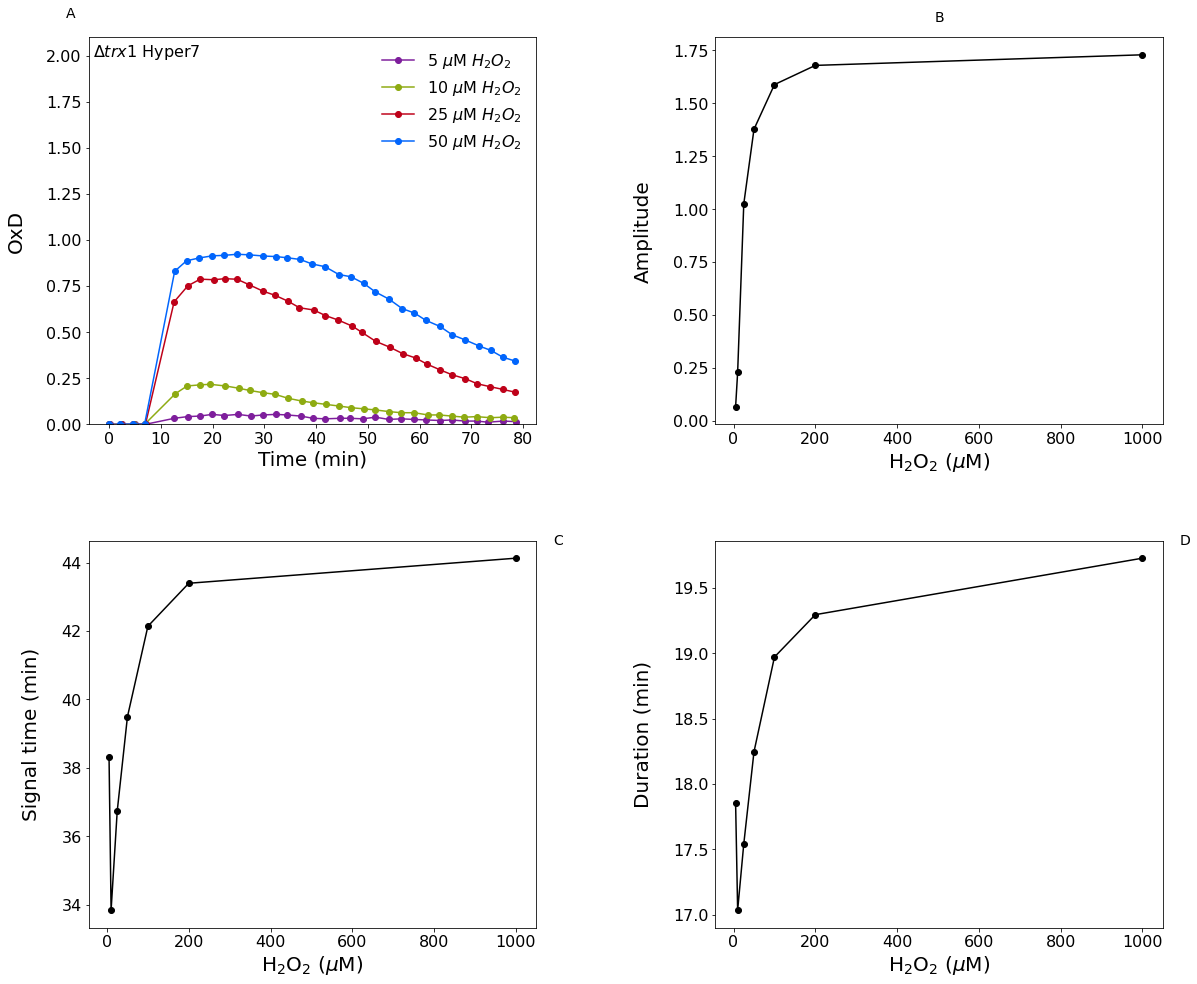

In [41]:
fig=plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(221)

# Plot data
ax1.plot(df4.h7Time_5uM, df4.h7OxD_5uM, 'o-', color='xkcd:purple', label='5 $\mu$M $H_{2}O_{2}$')
ax1.plot(df4.h7Time_10uM, df4.h7OxD_10uM, 'o-', color='xkcd:pea green', label='10 $\mu$M $H_{2}O_{2}$')
ax1.plot(df4.h7Time_25uM, df4.h7OxD_25uM, 'o-', color='xkcd:scarlet', label='25 $\mu$M $H_{2}O_{2}$')
ax1.plot(df4.h7Time_50uM, df4.h7OxD_50uM, 'o-', color='xkcd:bright blue', label='50 $\mu$M $H_{2}O_{2}$')
#ax1.plot(df4.h7Time_100uM, df4.h7OxD_100uM, 'o-', color='xkcd:orange', label='100 $\mu$M $H_{2}O_{2}$')
#ax1.plot(df4.h7Time_200uM, df4.h7OxD_200uM, 'o-', color='xkcd:turquoise', label='200 $\mu$M $H_{2}O_{2}$')
#ax1.plot(df4.h7Time_1000uM, df4.h7OxD_1000uM, 'o-', color='xkcd:purple', label='1000 $\mu$M $H_{2}O_{2}$')

# Set y-axis limit and labels
ax1.set_ylim(0,2.1)
ax1.set_ylabel(r'OxD',labelpad=20, size=20)
ax1.set_xlabel(r'Time (min)', size=20)
ax1.tick_params(axis='y',labelsize=16)
ax1.tick_params(axis='x',labelsize=16)

# Add legend
ax1.legend(fontsize=16,frameon=False)

# Add label 'A' to Subplot 1
ax1.annotate(r'A', xy=(-0.050,1.05), xycoords='axes fraction', size=14)

ax2 = fig.add_subplot(222)
ax2.plot(hyper7_trx.Conc, hyper7_trx.A,'o-', color='black' )
ax2.set_ylabel(r'Amplitude',labelpad=20, size=20)
ax2.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax2.annotate(r'B', xy=(0.5,1.05),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax2.tick_params(axis='y',labelsize=16)
ax2.tick_params(axis='x',labelsize=16)

ax3 = fig.add_subplot(223)
ax3.plot(hyper7_trx.Conc, hyper7_trx.Tau,'o-', color='black' )
ax3.set_ylabel(r'Signal time (min)',labelpad=20, size=20)
ax3.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax3.annotate(r'C', xy=(1.05,1),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax3.tick_params(axis='y',labelsize=16)
ax3.tick_params(axis='x',labelsize=16)

ax4 = fig.add_subplot(224)
ax4.plot(hyper7_trx.Conc, hyper7_trx.Theta,'o-', color='black' )
ax4.set_ylabel(r'Duration (min)',labelpad=20, size=20)
ax4.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax4.annotate(r'D', xy=(1.05,1),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax4.tick_params(axis='y',labelsize=16)
ax4.tick_params(axis='x',labelsize=16)

plt.tight_layout()
fig.subplots_adjust(wspace=0.4, hspace=0.3, right=0.9, top=0.88)
ax1.annotate('\u0394$trx$1 Hyper7', xy=(0.01,0.95), xycoords='axes fraction', size=16)

plt.savefig("hyper_trxdel.png", dpi=400, bbox_inches='tight', pad_inches=0.5)
plt.show()

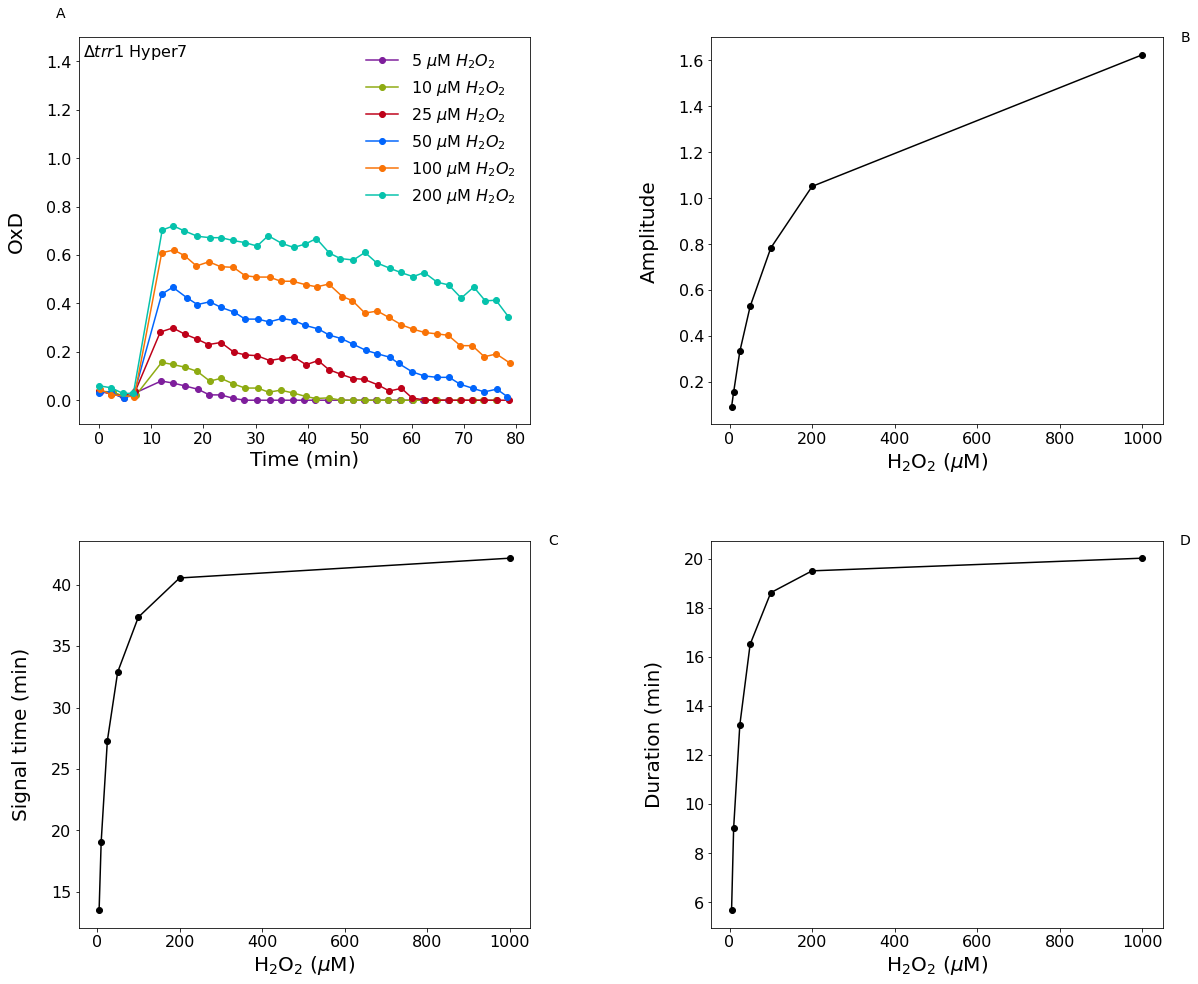

In [42]:
fig=plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(221)
ax1.plot(df5.h7Time_5uM, df5.h7OxD_5uM, 'o-', color='xkcd:purple',label='5 $\mu$M $H_{2}O_{2}$')
ax1.plot(df5.h7Time_10uM, df5.h7OxD_10uM, 'o-', color='xkcd:pea green',label='10 $\mu$M $H_{2}O_{2}$')
ax1.plot(df5.h7Time_25uM, df5.h7OxD_25uM, 'o-', color='xkcd:scarlet',label='25 $\mu$M $H_{2}O_{2}$')
ax1.plot(df5.h7Time_50uM, df5.h7OxD_50uM, 'o-', color='xkcd:bright blue',label='50 $\mu$M $H_{2}O_{2}$')
ax1.plot(df5.h7Time_100uM, df5.h7OxD_100uM, 'o-', color='xkcd:orange',label='100 $\mu$M $H_{2}O_{2}$')
ax1.plot(df5.h7Time_200uM, df5.h7OxD_200uM, 'o-', color='xkcd:turquoise',label='200 $\mu$M $H_{2}O_{2}$')
#ax1.plot(df5.h7Time_1000uM, df5.h7OxD_1000uM, 'o-', color='xkcd:purple',label='1000 $\mu$M $H_{2}O_{2}$')
ax1.set_ylim(-0.1,1.5)
ax1.set_ylabel(r'OxD',labelpad=20, size=20)
ax1.set_xlabel(r'Time (min)', size=20)

ax1.legend(fontsize=16, frameon=False)
ax1.annotate('\u0394$trr$1 Hyper7', xy=(0.01,0.95), xycoords='axes fraction', size=16)
ax1.tick_params(axis='y',labelsize=16)
ax1.tick_params(axis='x',labelsize=16)

# Add label 'A' to Subplot 1
ax1.annotate(r'A', xy=(-0.050,1.05), xycoords='axes fraction', size=14)

ax2 = fig.add_subplot(222)
ax2.plot(df10.Conc, df10.A,'o-', color='black' )
ax2.set_ylabel(r'Amplitude',labelpad=20, size=20)
ax2.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax2.annotate(r'B', xy=(1.05,1),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax2.tick_params(axis='y',labelsize=16)
ax2.tick_params(axis='x',labelsize=16)

ax3 = fig.add_subplot(223)
ax3.plot(df10.Conc, df10.Tau,'o-', color='black' )
ax3.set_ylabel(r'Signal time (min)',labelpad=20, size=20)
ax3.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax3.annotate(r'C', xy=(1.05,1),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax3.tick_params(axis='y',labelsize=16)
ax3.tick_params(axis='x',labelsize=16)

ax4 = fig.add_subplot(224)
ax4.plot(df10.Conc, df10.Theta,'o-', color='black' )
ax4.set_ylabel(r'Duration (min)',labelpad=20, size=20)
ax4.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=20)
ax4.annotate(r'D', xy=(1.05,1),  xycoords='axes fraction',horizontalalignment='center', verticalalignment='center', size=14)
ax4.tick_params(axis='y',labelsize=16)
ax4.tick_params(axis='x',labelsize=16)

plt.tight_layout()
fig.subplots_adjust(wspace=0.4, hspace=0.3, right=0.9, top=0.88)
plt.savefig("hyper_trr.png", dpi=400, bbox_inches='tight', pad_inches=0.5)


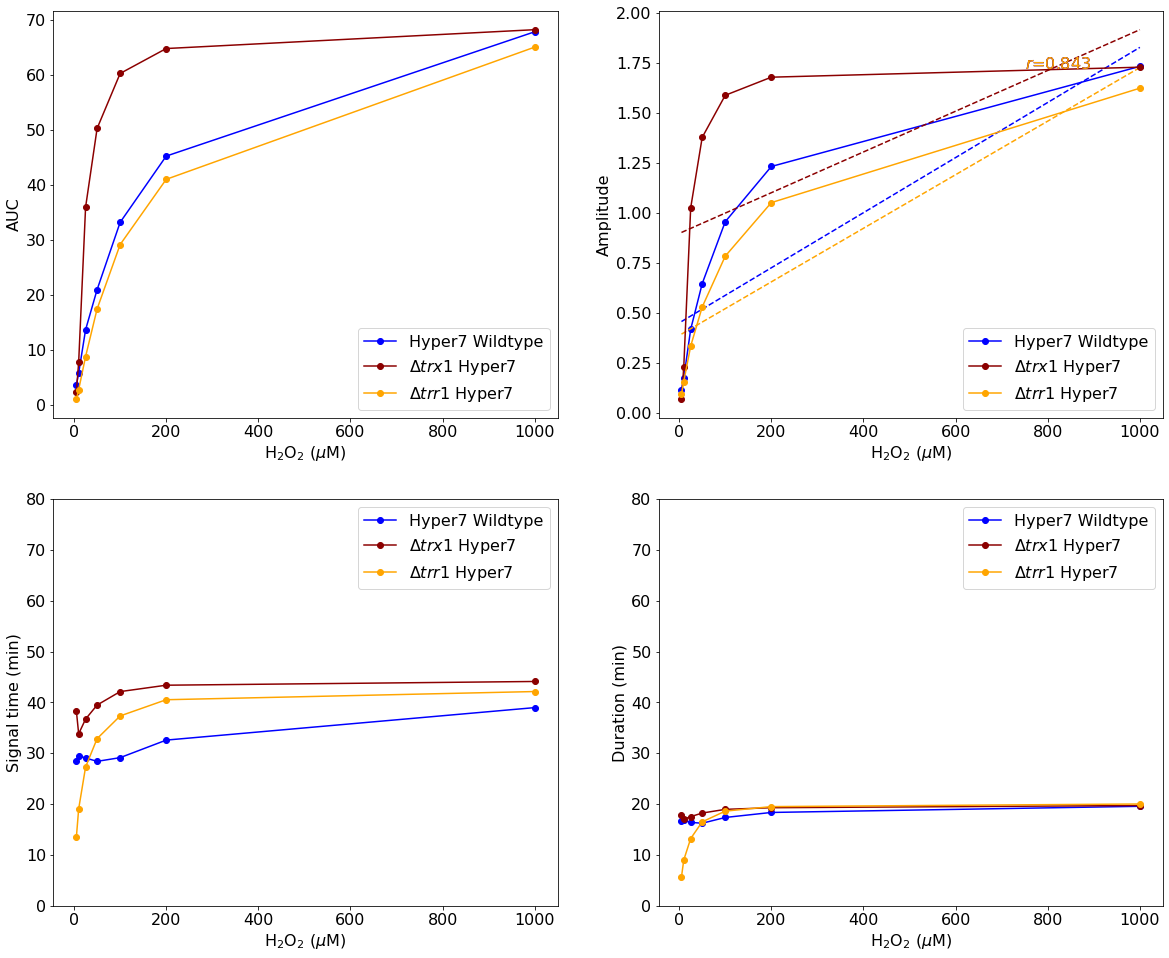

In [43]:
fig=plt.figure(figsize=(18,15))

#AUC
ax = fig.add_subplot(221)
#ax.plot(df6.Conc, df6.Ii,'o-', color='black', label='Hyper' )
ax.plot(df7.Conc, df7.Ii,'o-', color='blue', label='Hyper7 Wildtype' )
#ax.plot(df8.Conc, df8.Ii,'o-', color='red', label='roGFP-Tpx1')
ax.plot(hyper7_trx.Conc, hyper7_trx.Ii,'o-', color='darkred', label='\u0394$trx$1 Hyper7')
ax.plot(hyper7_trr.Conc, hyper7_trr.Ii,'o-', color='orange', label='\u0394$trr$1 Hyper7' )
#ax.set_xlim(xmax=200)
ax.legend(loc='best', fontsize=16)
ax.set_ylabel(r'AUC', size=16)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=16)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)

#Amplitude
ax = fig.add_subplot(222)
#ax.plot(df6.Conc, df6.A,'o-', color='black', label='Hyper' )
ax.plot(df7.Conc, df7.A,'o-', color='blue', label='Hyper7 Wildtype' )
plt.plot(hyper_sig['Conc'], slope_A_H1 * hyper_sig['Conc'] + intercept_A_H1, color='blue', linestyle='--')
ax.annotate('$r$=0.843', xy=(750, 1.72), xycoords='data',color= 'blue',size=16)
plt.plot(hyper7_trx['Conc'], slope_A_h3 * hyper7_trx['Conc'] + intercept_A_h3, color='darkred', linestyle='--')
ax.annotate('$r$=0.843', xy=(750, 1.72), xycoords='data',color= 'darkred',size=16)
plt.plot(hyper7_trr['Conc'], slope_A_h4 * hyper7_trr['Conc'] + intercept_A_h4, color='orange', linestyle='--')
ax.annotate('$r$=0.843', xy=(750, 1.72), xycoords='data',color= 'orange',size=16)

#ax.plot(df8.Conc, df8.A,'o-', color='red', label='roGFP-Tpx1')
ax.plot(hyper7_trx.Conc, hyper7_trx.A,'o-', color='darkred', label='\u0394$trx$1 Hyper7')
ax.plot(hyper7_trr.Conc, hyper7_trr.A,'o-', color='orange', label='\u0394$trr$1 Hyper7' )
#ax.set_xlim(xmax=200)
ax.legend(loc='best', fontsize=16)
ax.set_ylabel(r'Amplitude', size=16)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=16)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)

#Signal time
ax = fig.add_subplot(223)
#ax.plot(df6.Conc, df6.Tau,'o-', color='black', label='Hyper' )
ax.plot(df7.Conc, df7.Tau,'o-', color='blue', label='Hyper7 Wildtype' )
#ax.plot(df8.Conc, df8.Tau,'o-', color='red', label='roGFP-Tpx1')
ax.plot(hyper7_trx.Conc, hyper7_trx.Tau,'o-', color='darkred', label='\u0394$trx$1 Hyper7')
ax.plot(hyper7_trr.Conc, hyper7_trr.Tau,'o-', color='orange', label='\u0394$trr$1 Hyper7' )
#ax.set_xlim(xmax=200)
ax.legend(loc='best', fontsize=16)
ax.set_ylim(0,80)
ax.set_ylabel(r'Signal time (min)', size=16)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=16)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)

#Signal duration
ax = fig.add_subplot(224)
#ax.plot(df6.Conc, df6.Theta,'o-', color='black', label='Hyper' )
ax.plot(df7.Conc, df7.Theta,'o-', color='blue', label='Hyper7 Wildtype' )
#ax.plot(df8.Conc, df8.Theta,'o-', color='red', label='roGFP-Tpx1')
ax.plot(hyper7_trx.Conc, hyper7_trx.Theta,'o-', color='darkred', label='\u0394$trx$1 Hyper7')
ax.plot(hyper7_trr.Conc, hyper7_trr.Theta,'o-', color='orange', label='\u0394$trr$1 Hyper7' )
#ax.set_xlim(xmax=200)
ax.legend(loc='best', fontsize=16)
ax.set_ylabel(r'Duration (min)', size=16)
ax.set_ylim(0,80)
ax.set_xlabel(r'H$_2$O$_2$ ($\mu$M)', size=16)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)


plt.tight_layout()

fig.subplots_adjust(wspace=0.2, hspace=0.2, right=0.9, top=0.88)
plt.savefig("hyper_trrtrxdel.png", dpi=400, bbox_inches='tight', pad_inches=0.5)


# 